# Surprise Housing case Study

## Assignment Part - I


### Objective is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

##### The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

### Reading and Understanding Data

In [3]:
housingdata = pd.read_csv('train.csv', keep_default_na=False)

In [4]:
housingdata.shape

(1460, 81)

In [5]:
housingdata.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


### Data Details:

- There are total 1460 rows and 81 variables
- Data contains mixed variables, few categorical and few numerical.
- We can see that few variables have nan values. 

###### Some columns should have None value but pandas would treat it as null so lets replace it with not available.

In [7]:
housingdata[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = housingdata[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "Not Available")
housingdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Not Available,Reg,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Not Available,Reg,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,Not Available,IR1,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,Not Available,IR1,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,Not Available,IR1,Lvl,AllPub,...,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal,250000


In [8]:
housingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

- Column LotFrontage and MasVnrArea needs to be converted to numeric type.

In [9]:
## Convert two columns to 'numeric' type as mentioned above
housingdata['LotFrontage'] = pd.to_numeric(housingdata['LotFrontage'], errors='coerce')
housingdata['MasVnrArea'] = pd.to_numeric(housingdata['MasVnrArea'], errors='coerce')


### Data Analysis

#### Univariate Analysis

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

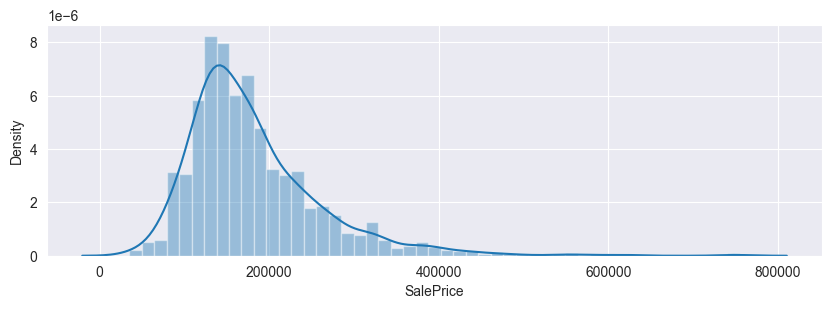

In [10]:
## let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,3])
sns.set_style('darkgrid')
sns.distplot(housingdata['SalePrice'])

##### we can see that the Price value are right skewed, We need to do log transformation

In [11]:
## Log transform the target variable
housingdata['SalePrice'] = np.log(housingdata['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

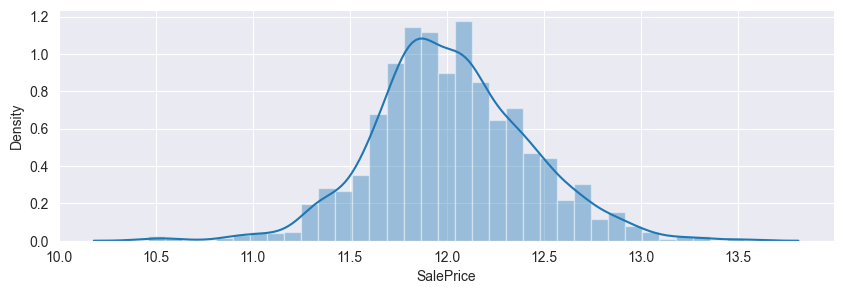

In [12]:
## let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,3])
sns.set_style('darkgrid')
sns.distplot(housingdata['SalePrice'])

In [13]:
## numerical columns
numerical_variable = housingdata.select_dtypes(include=['int64', 'float64'])
numerical_variable = numerical_variable.columns.tolist()

In [14]:
## categorical columns
categorical_variable = housingdata.select_dtypes(include=['object'])
categorical_variable= categorical_variable.head()

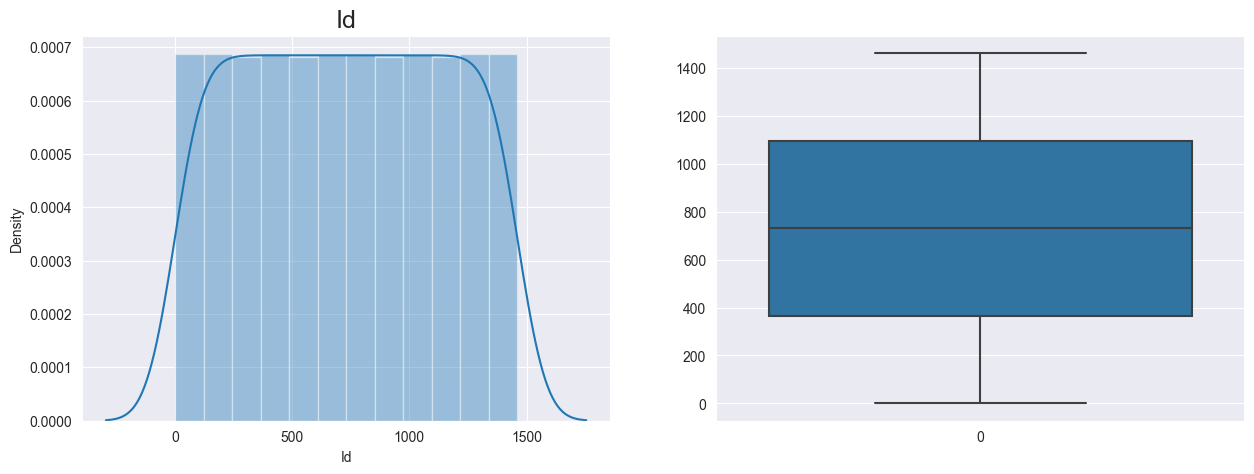

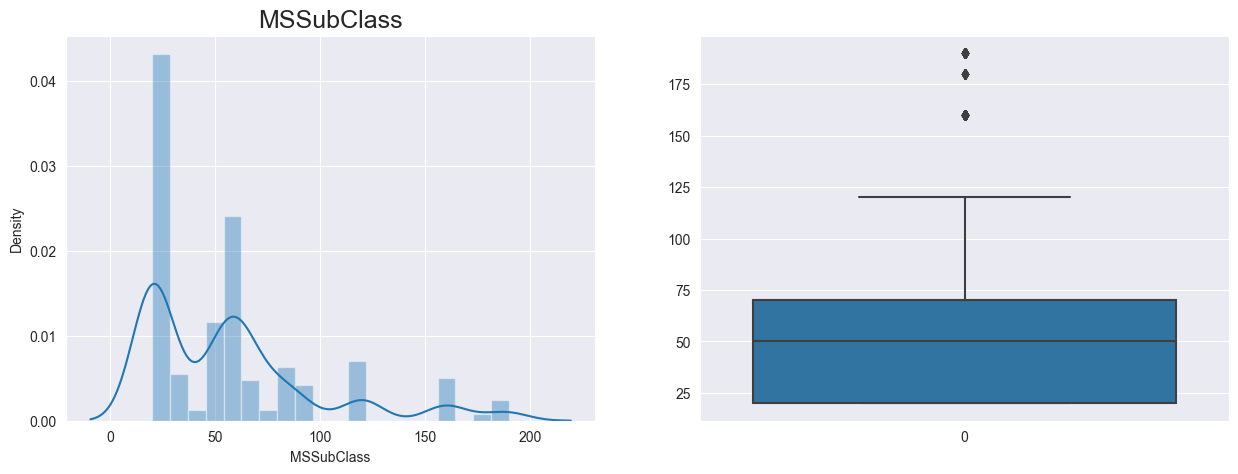

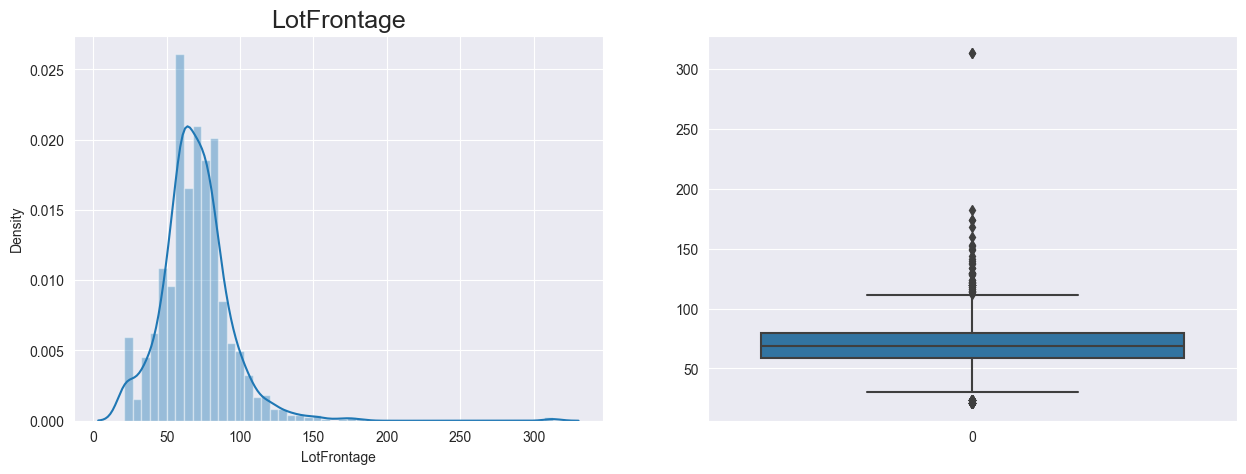

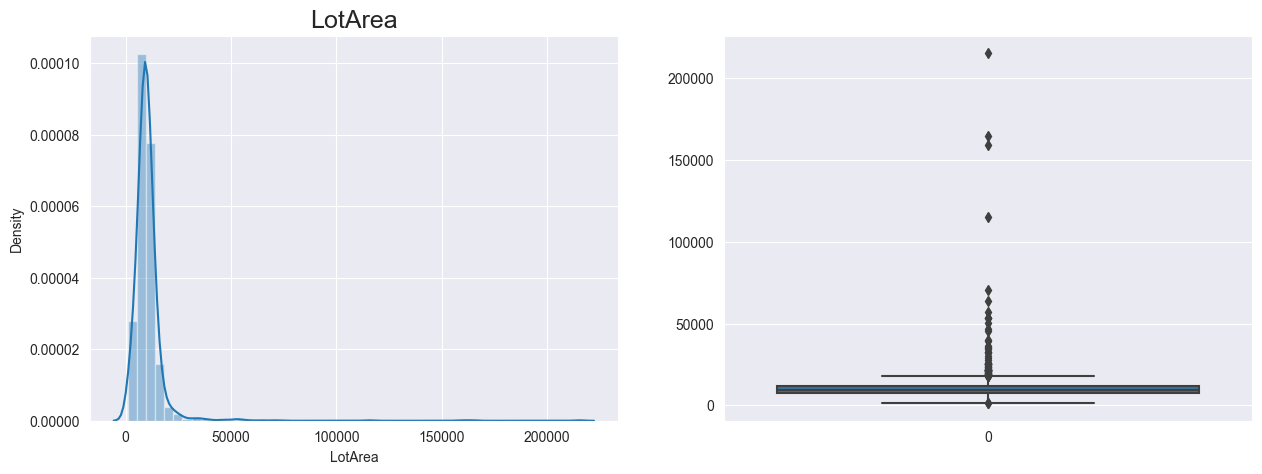

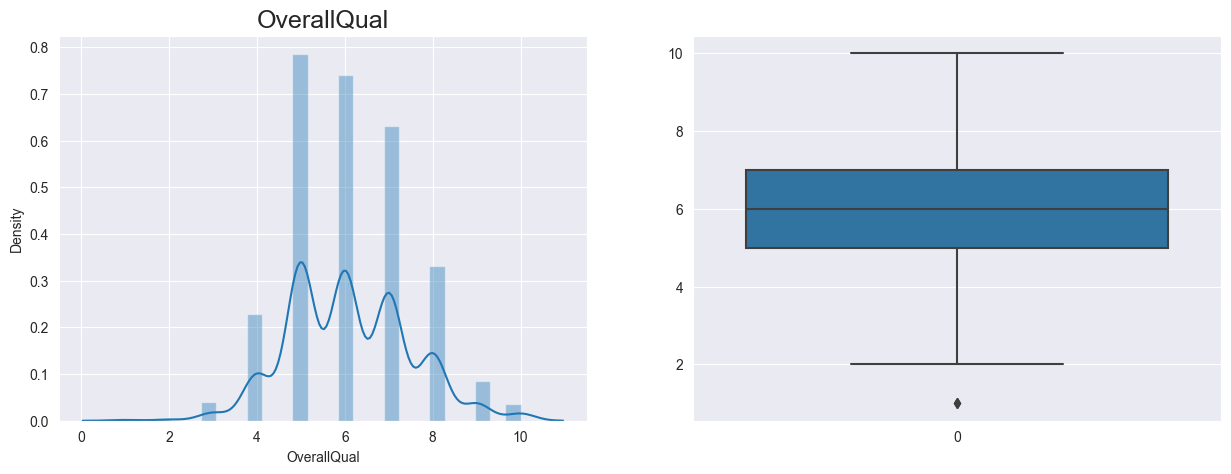

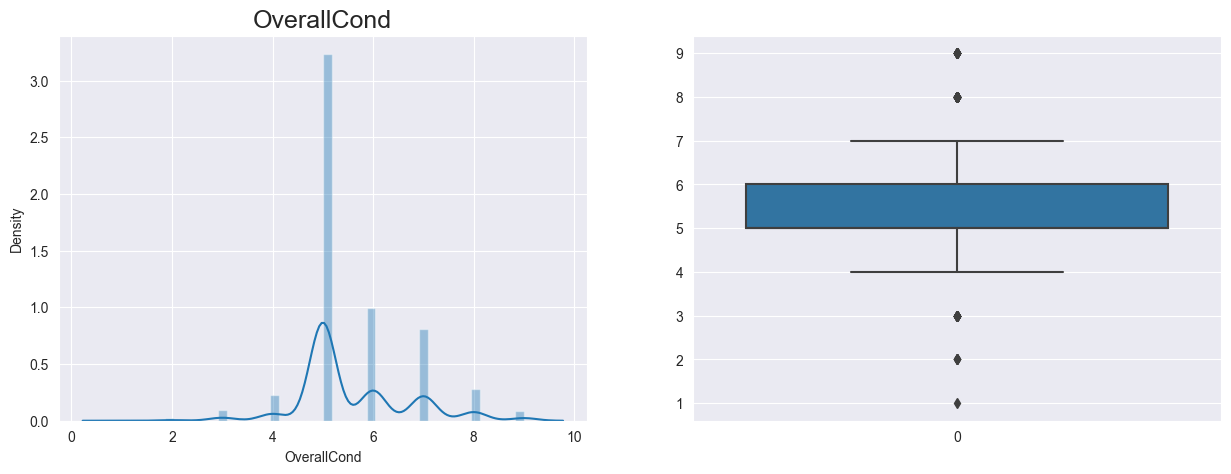

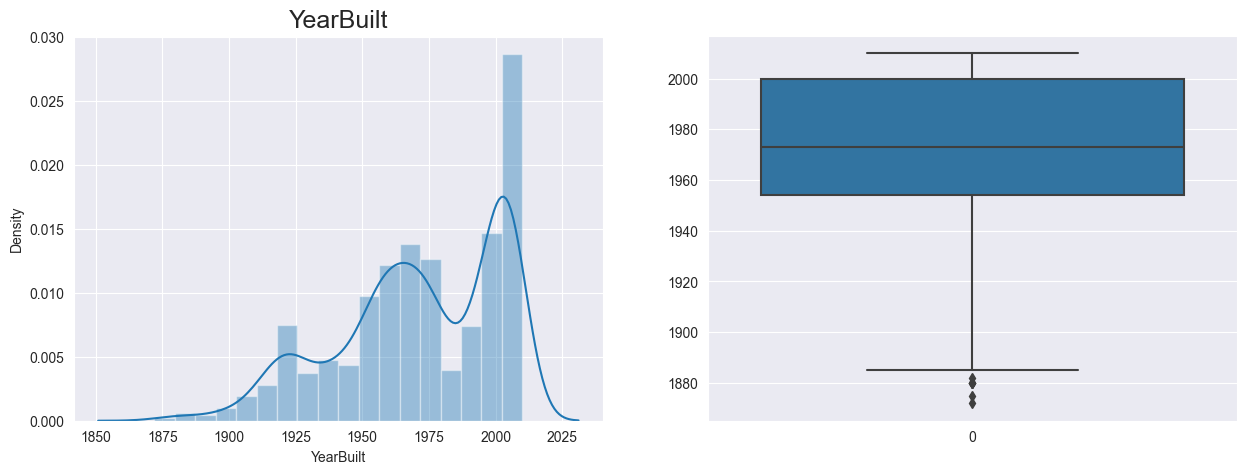

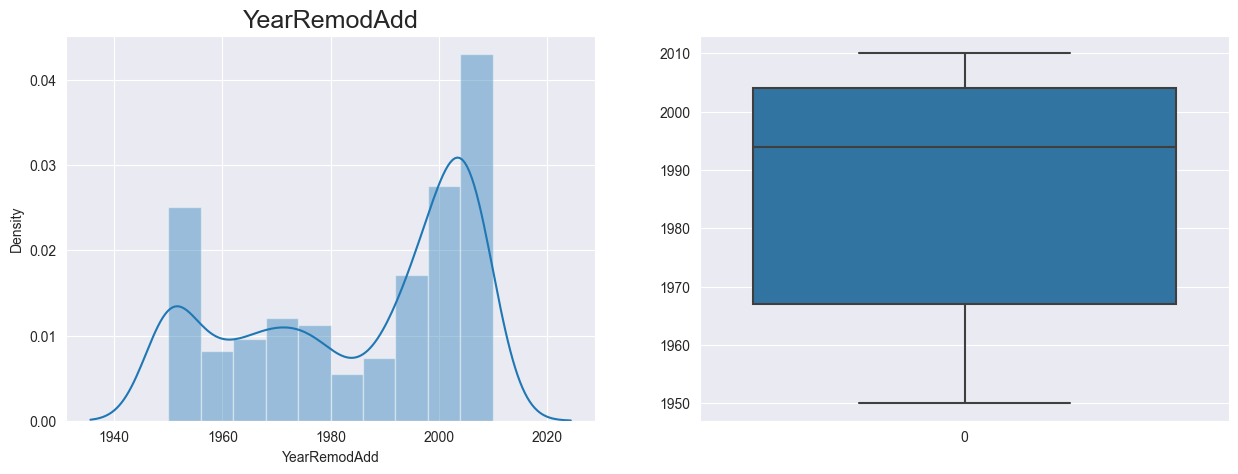

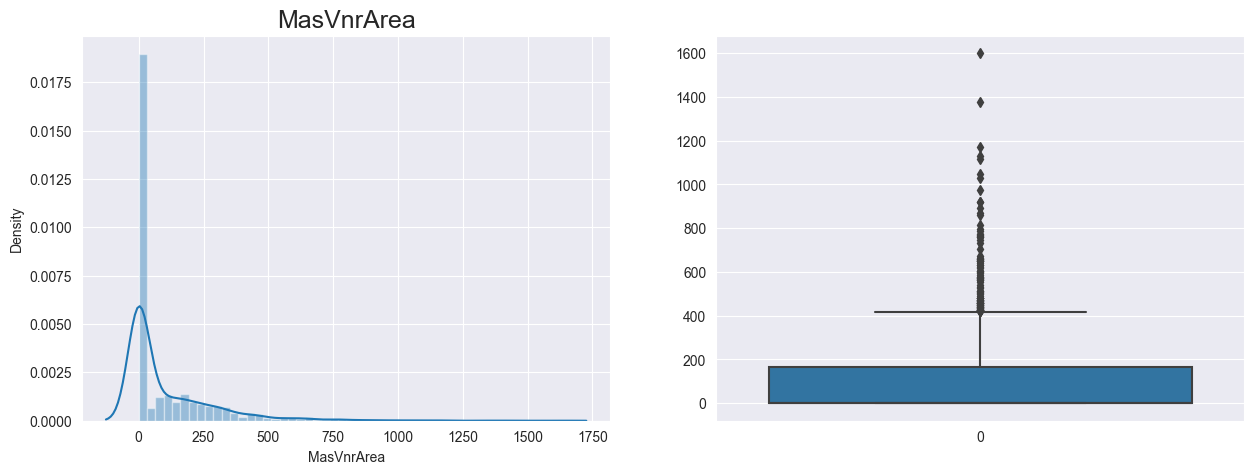

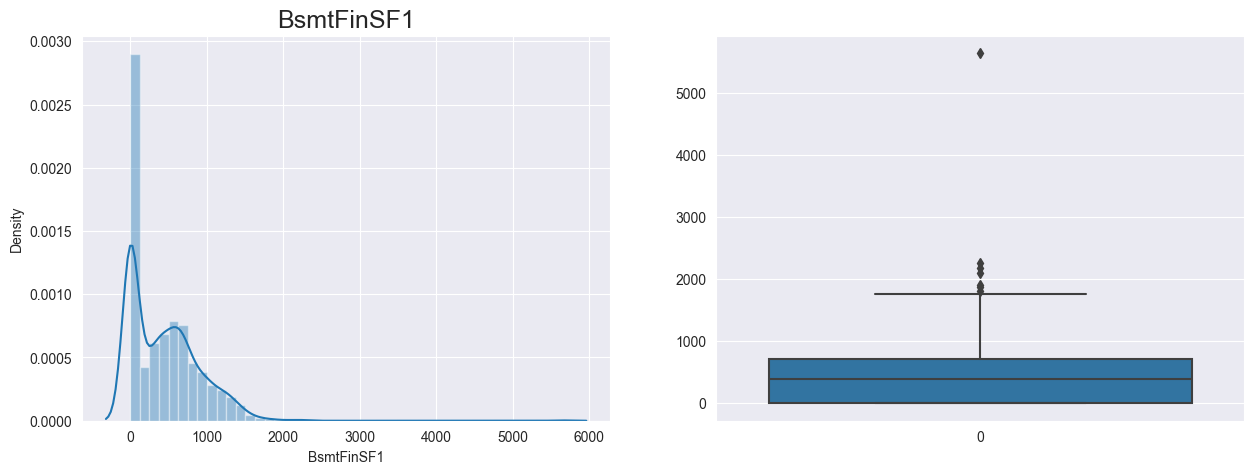

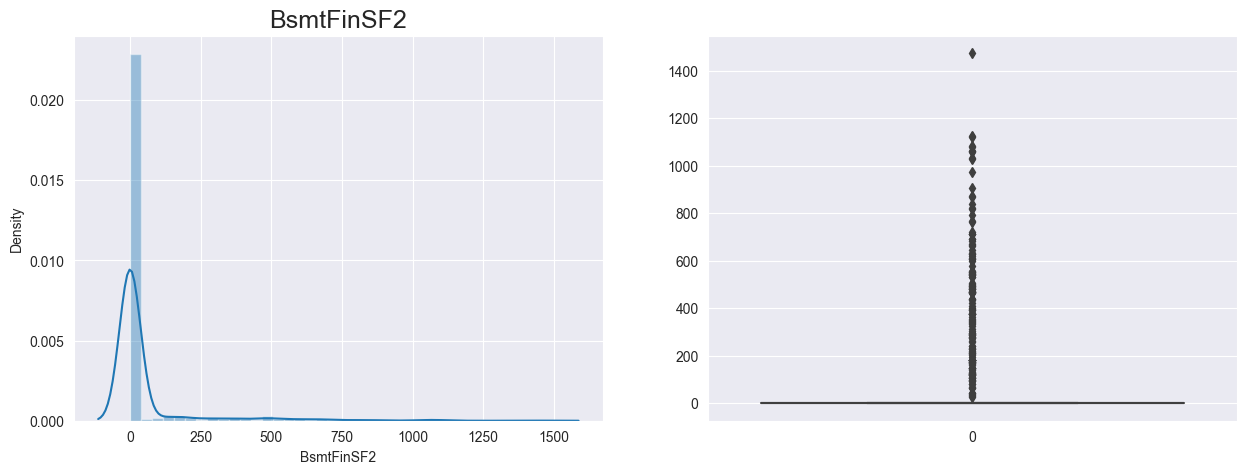

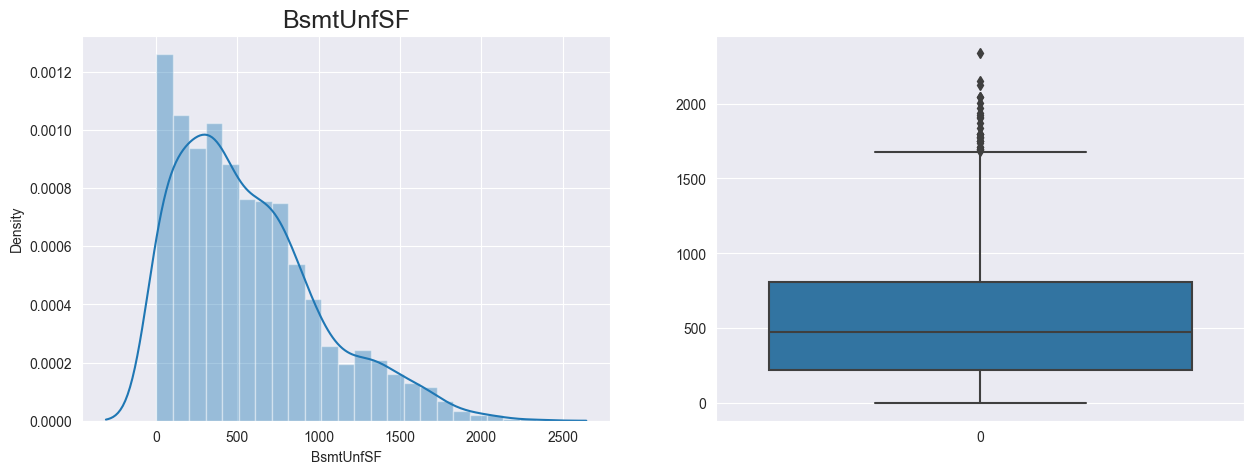

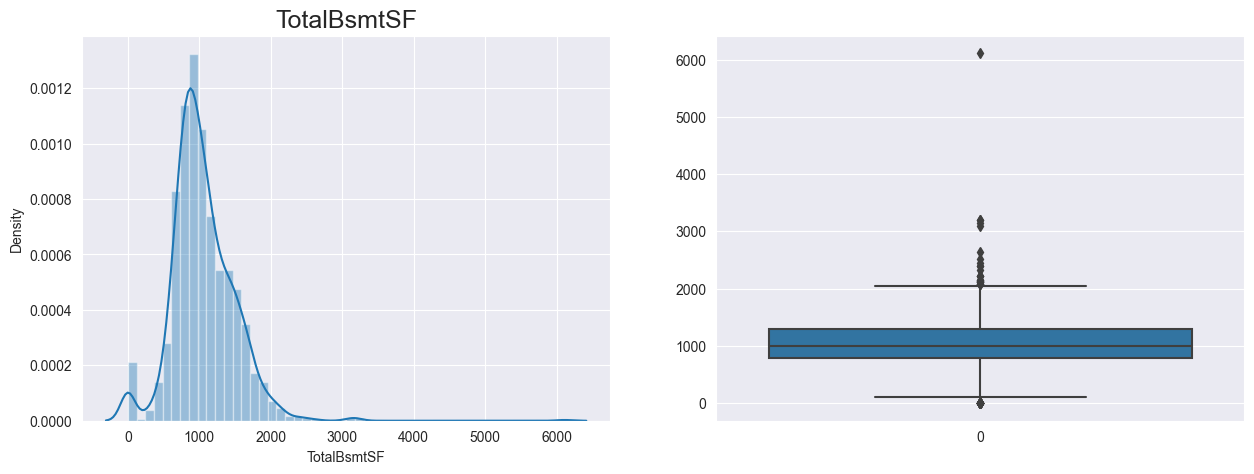

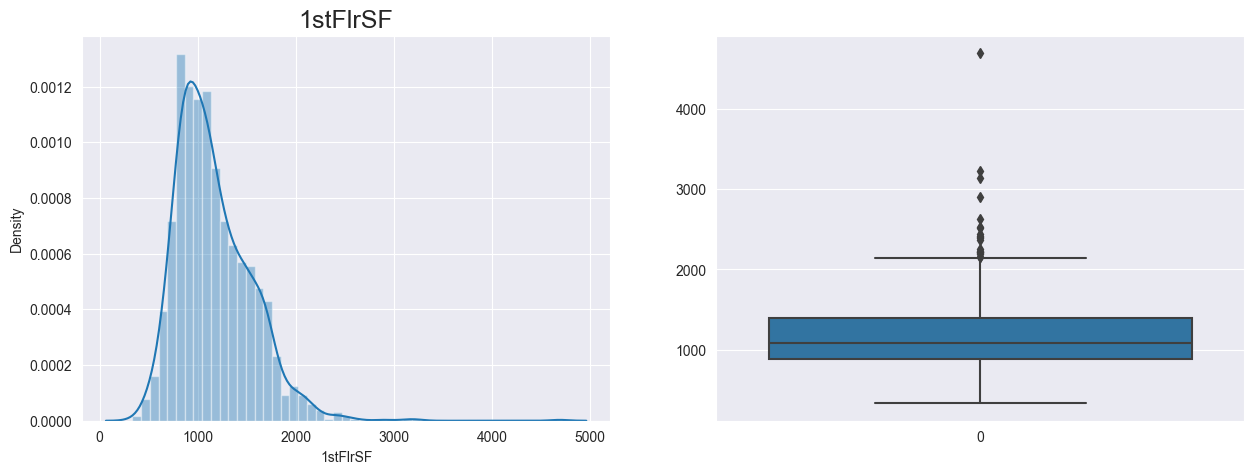

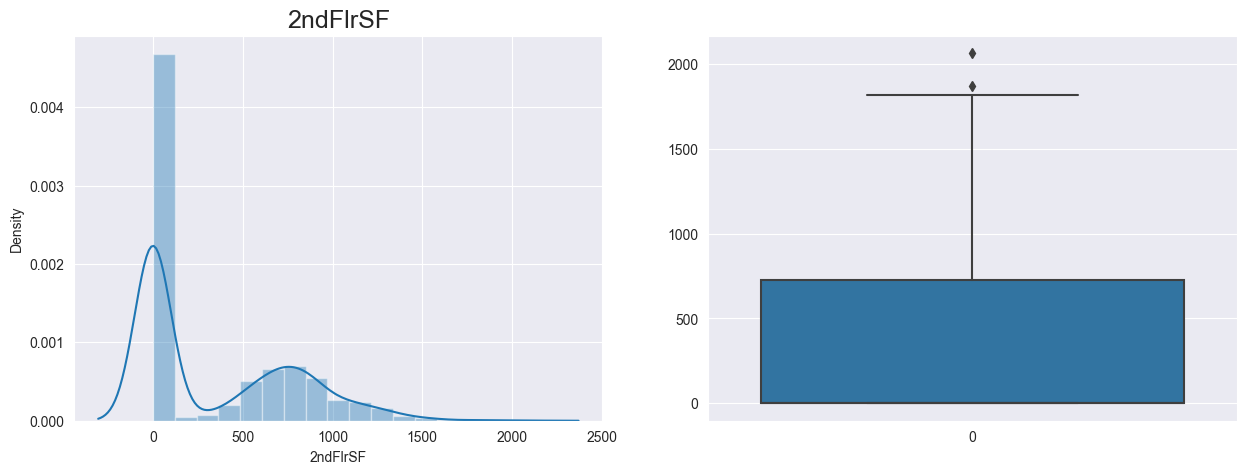

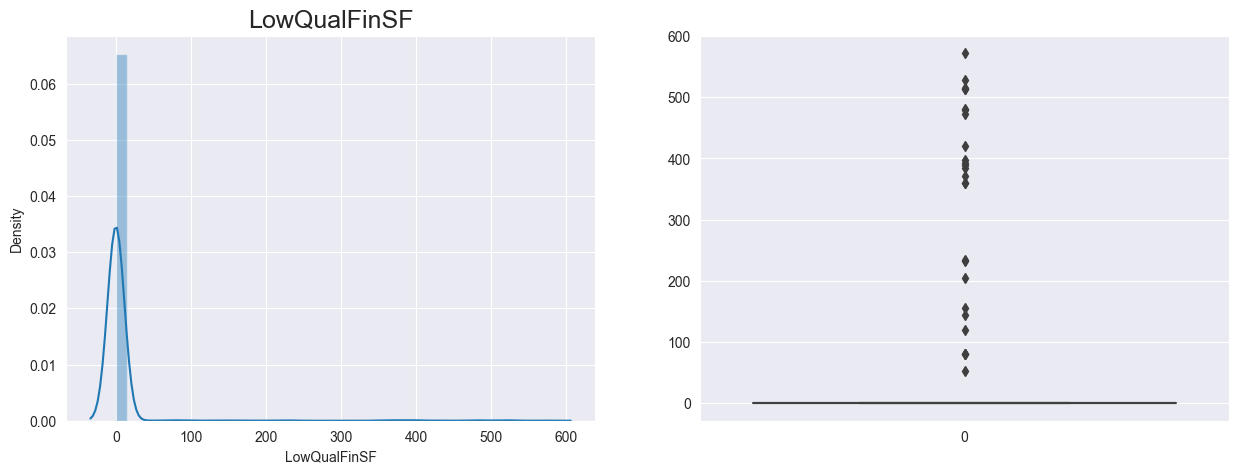

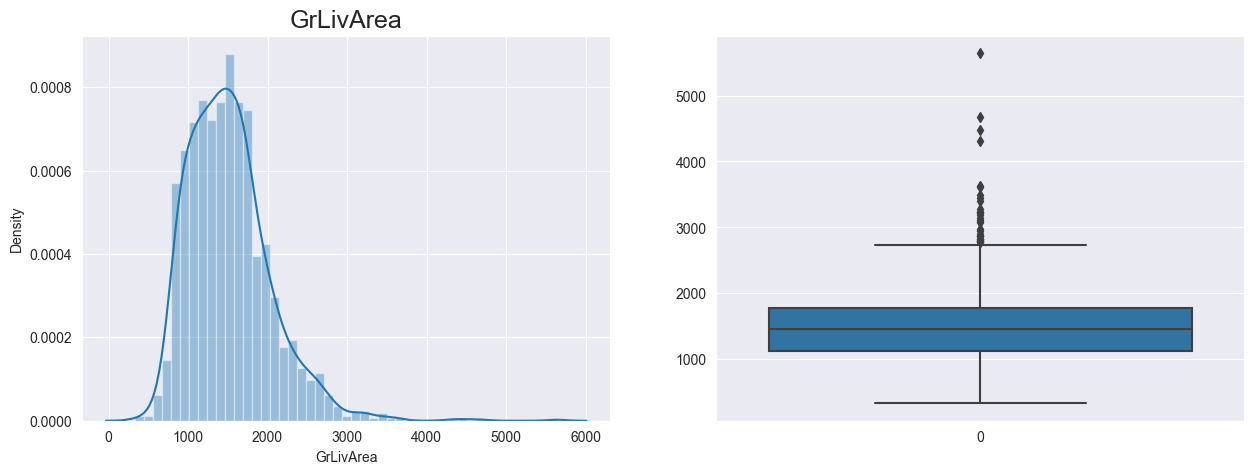

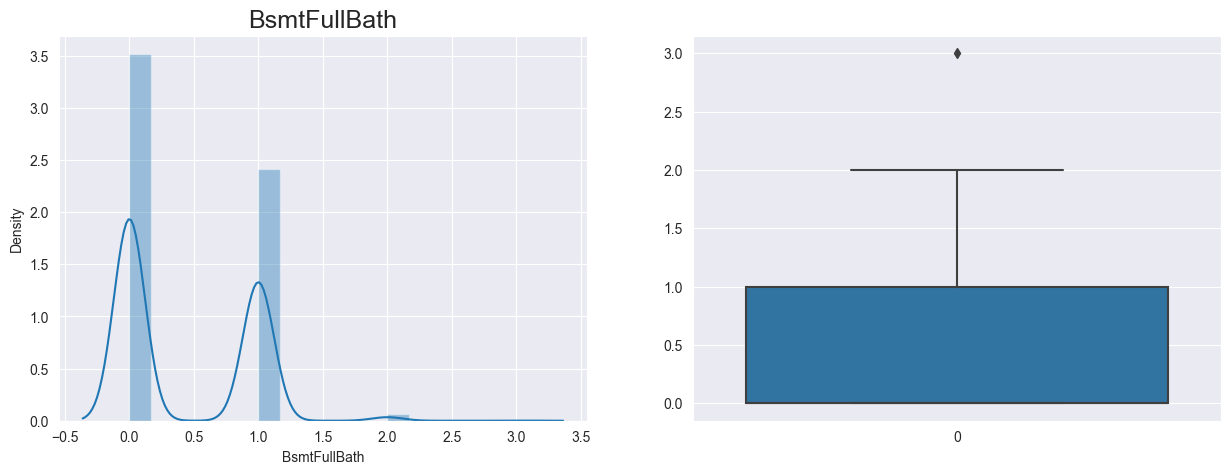

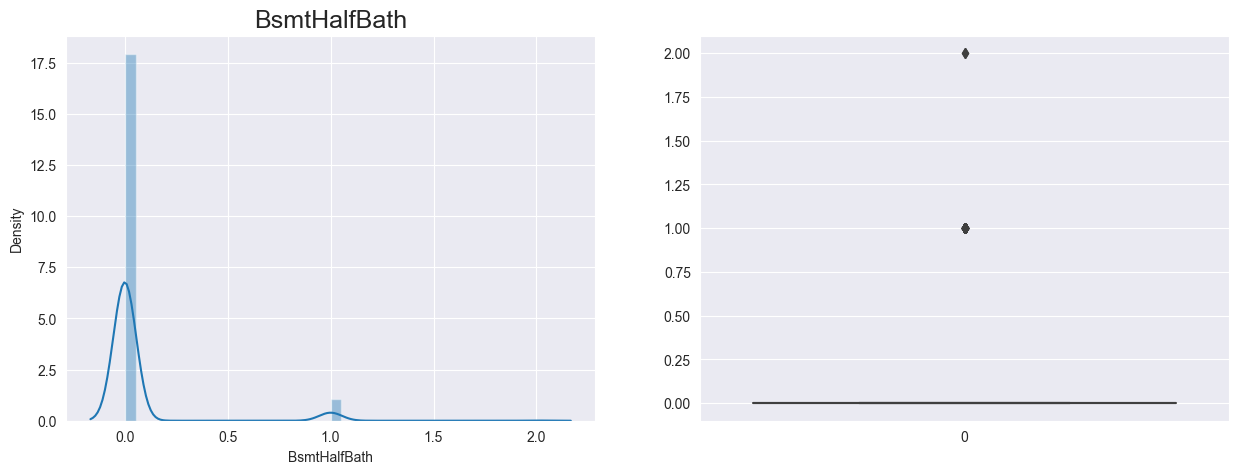

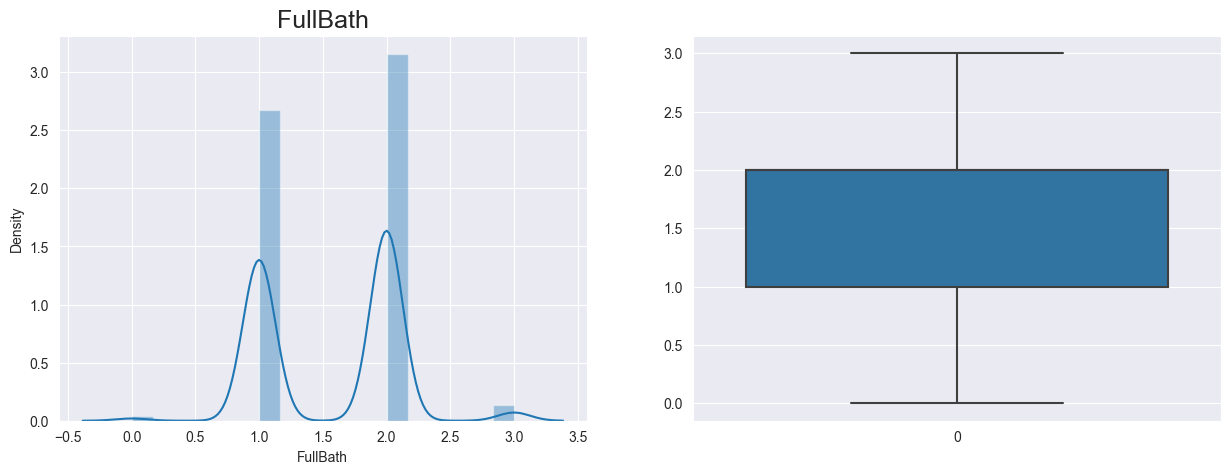

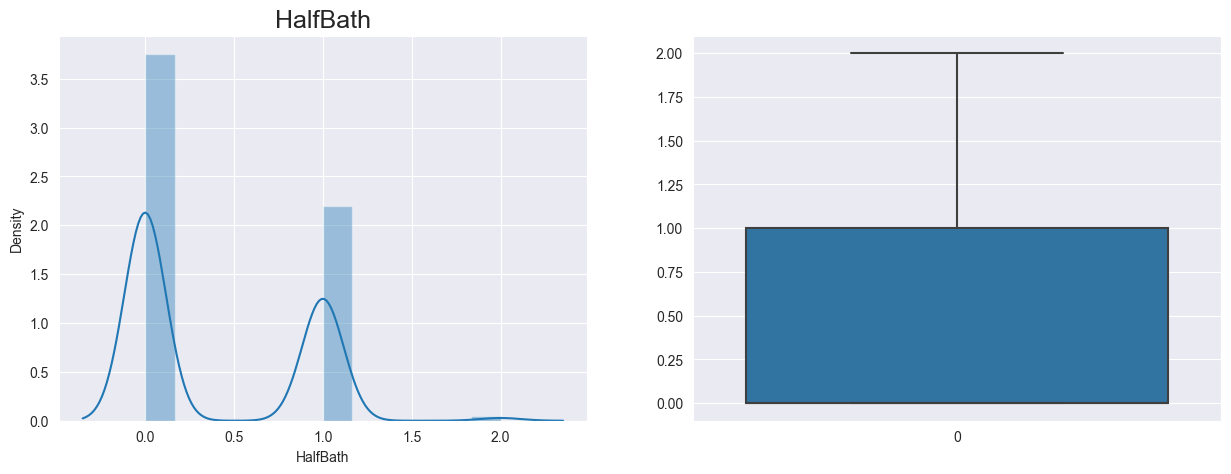

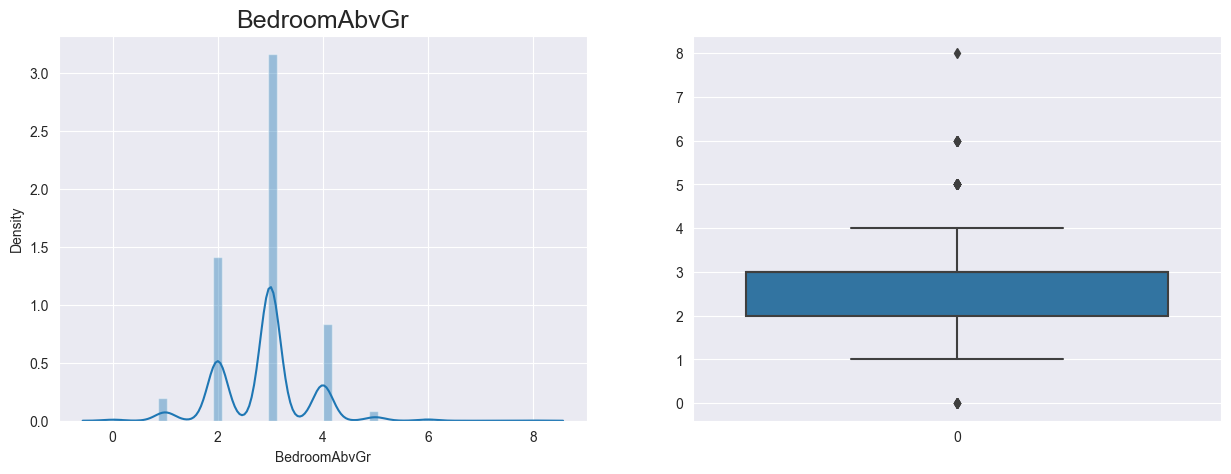

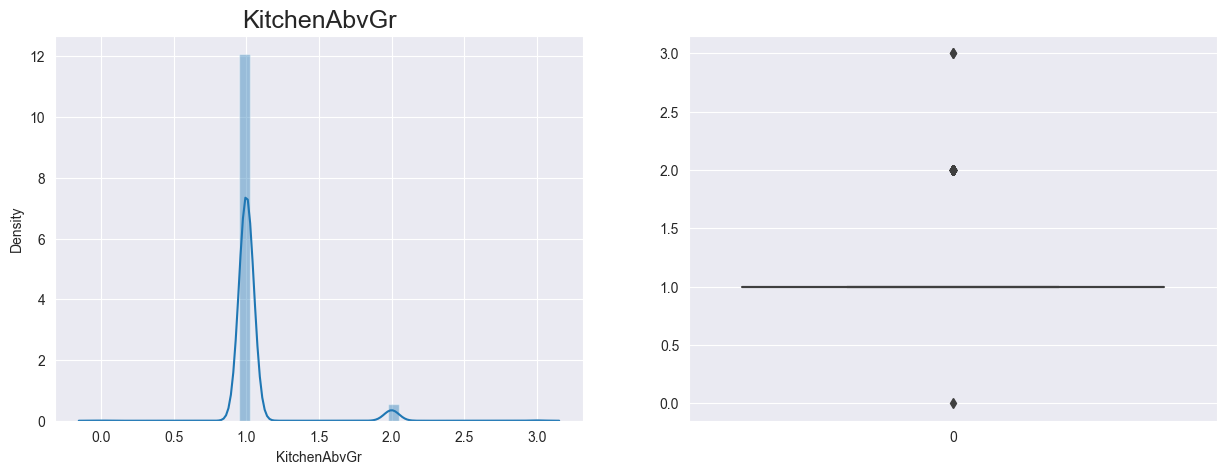

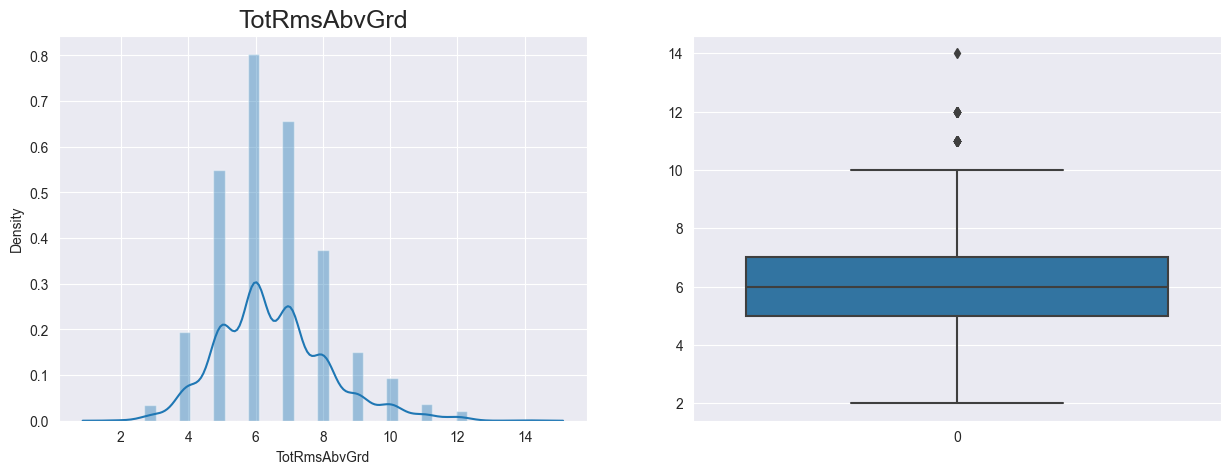

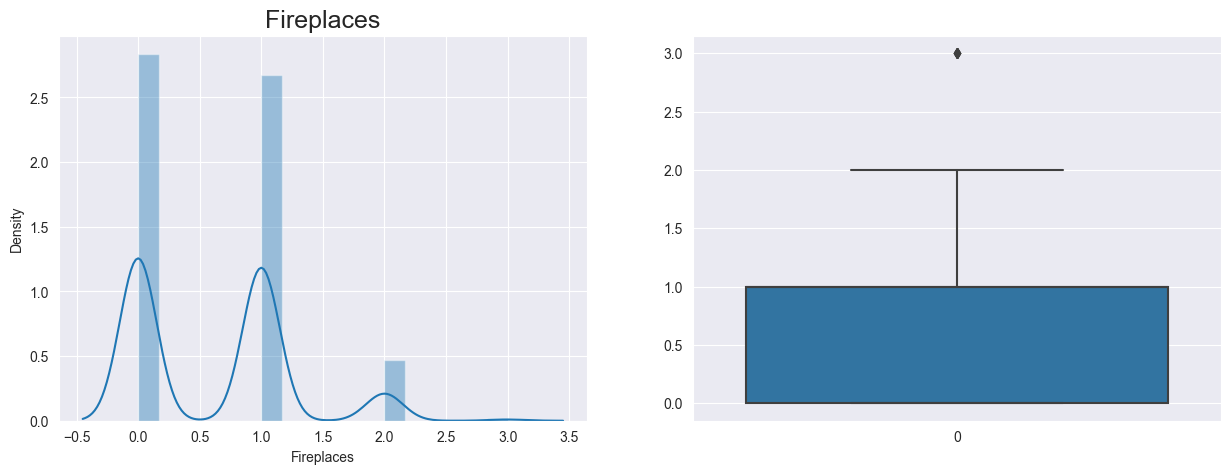

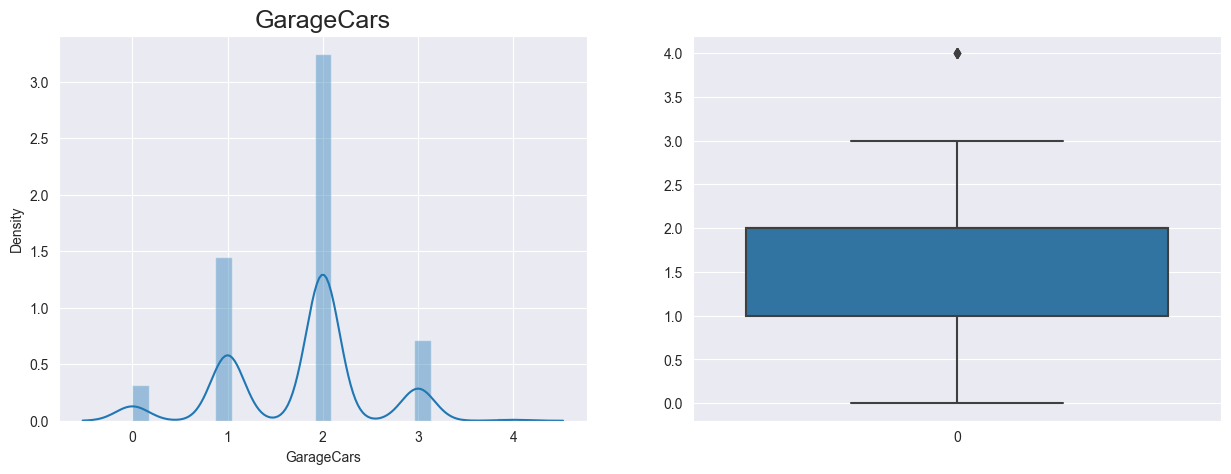

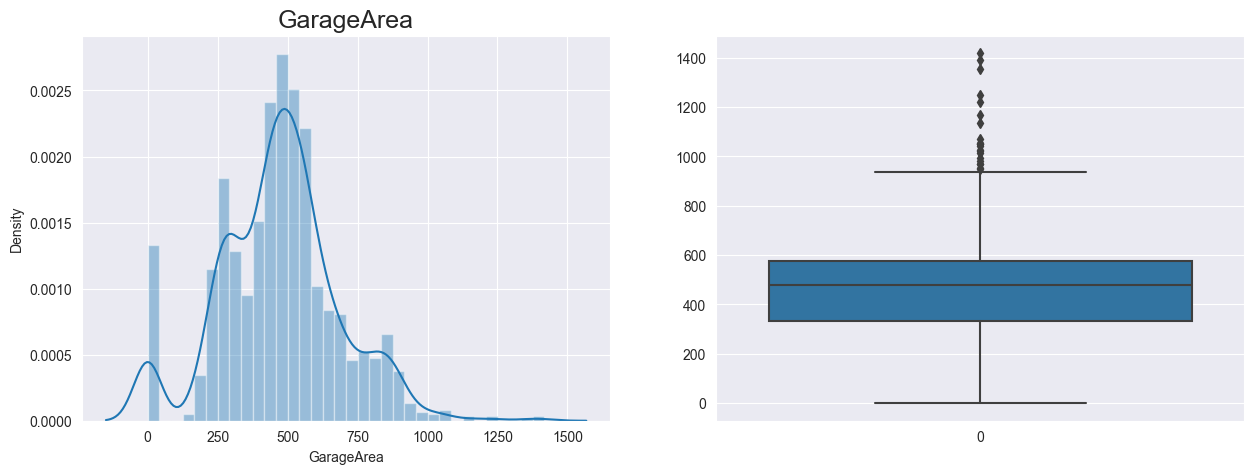

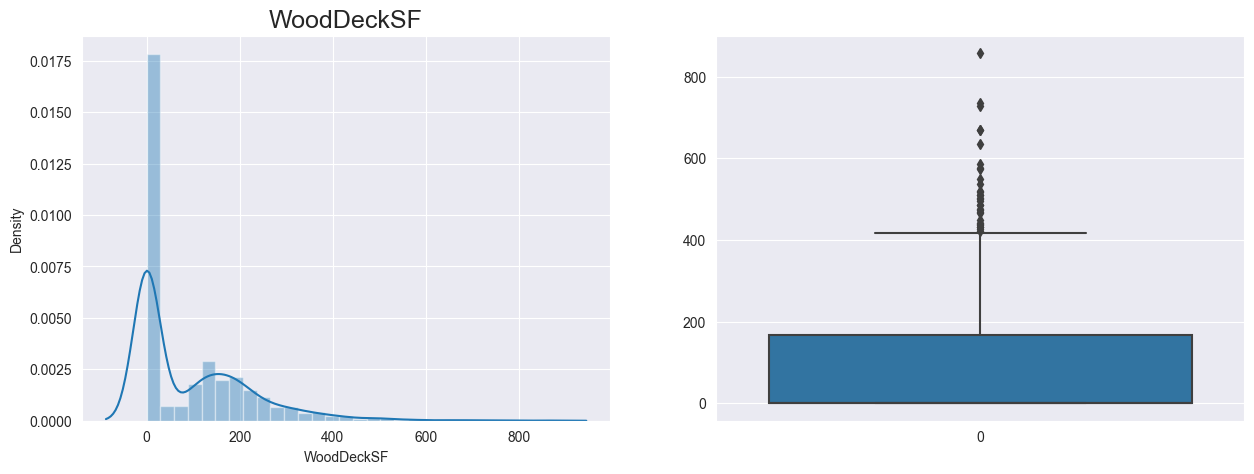

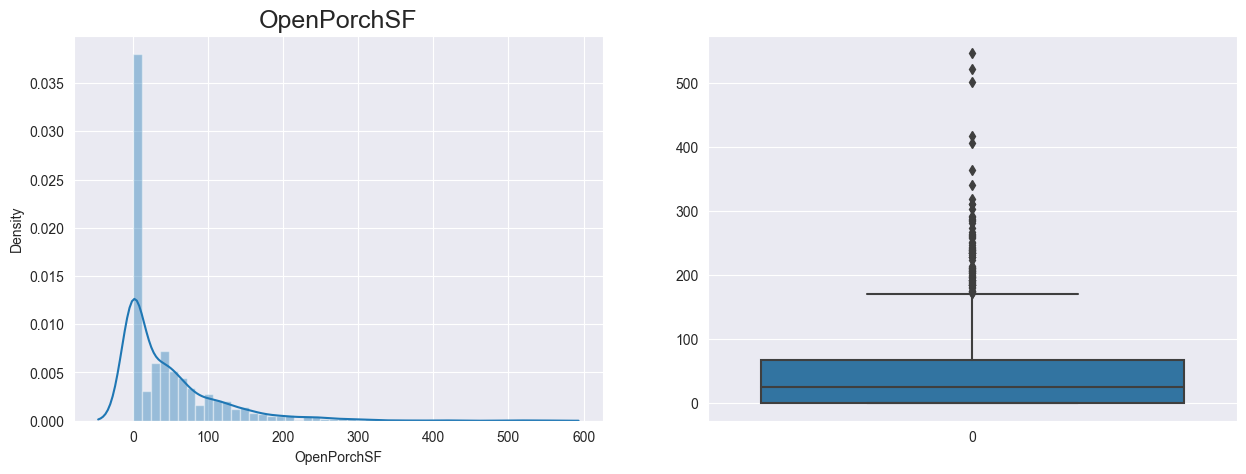

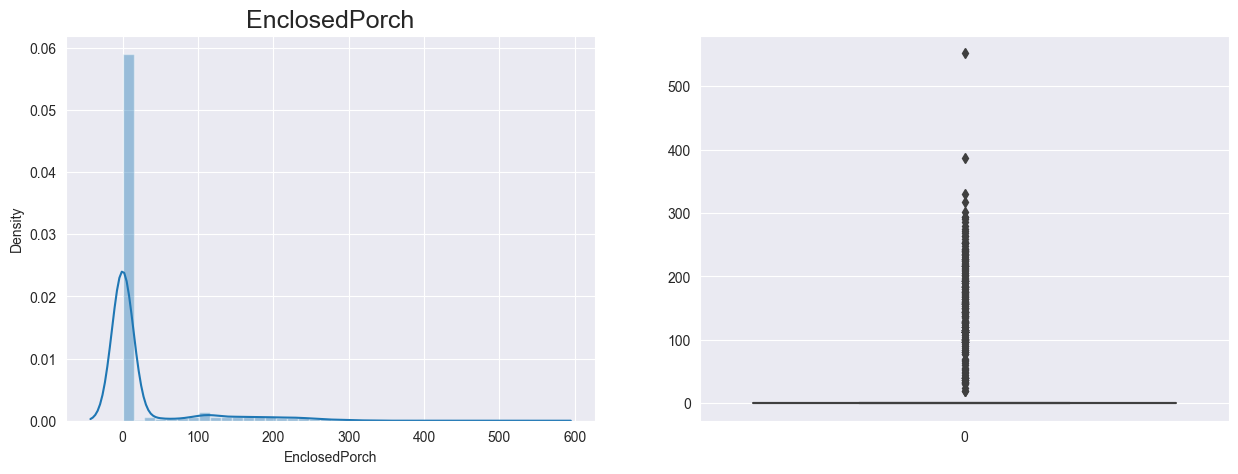

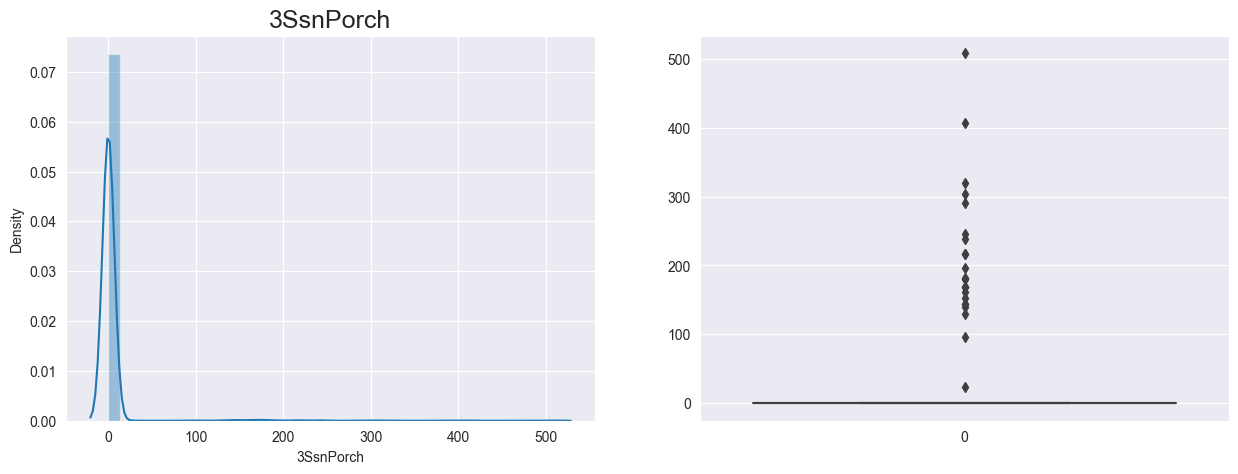

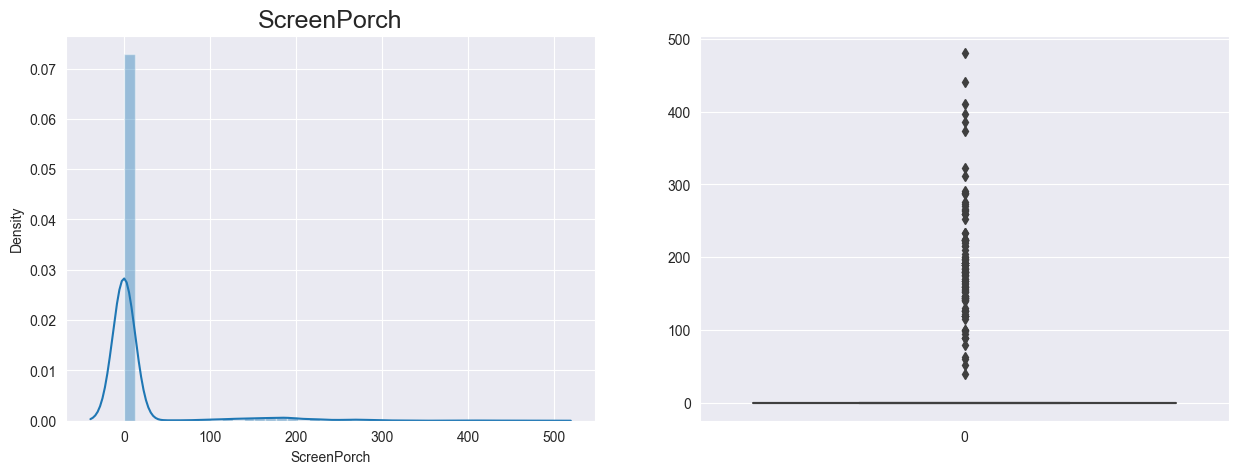

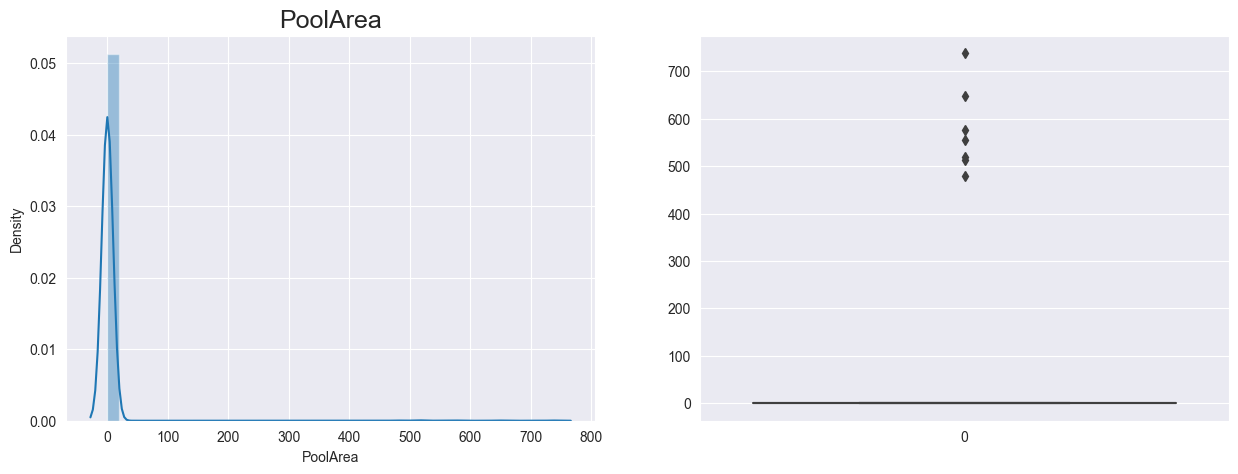

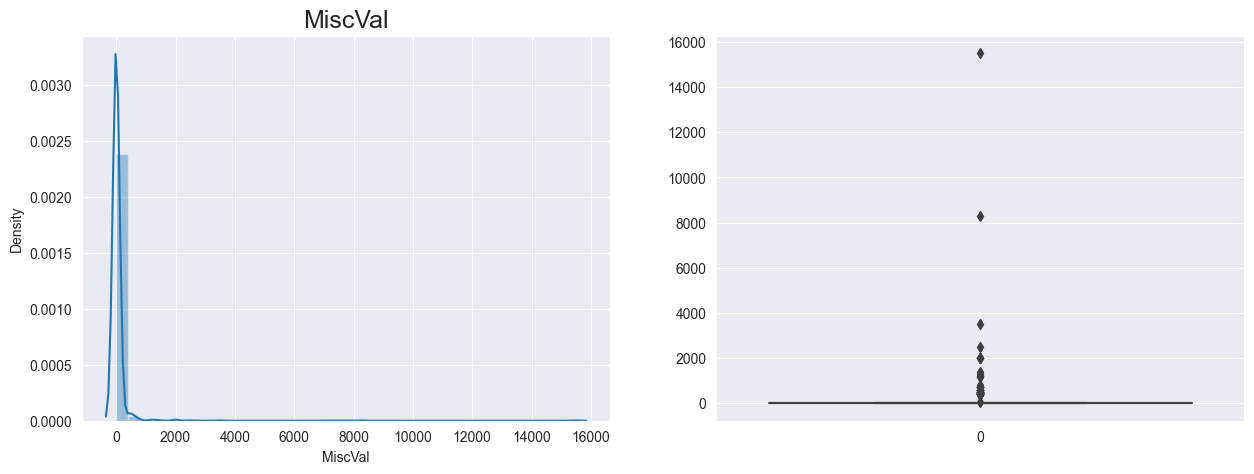

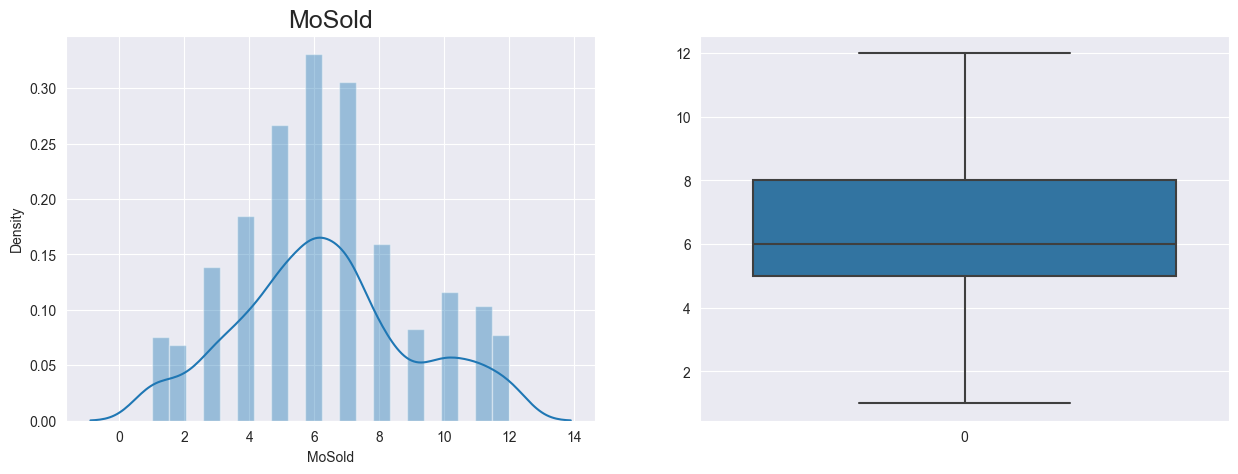

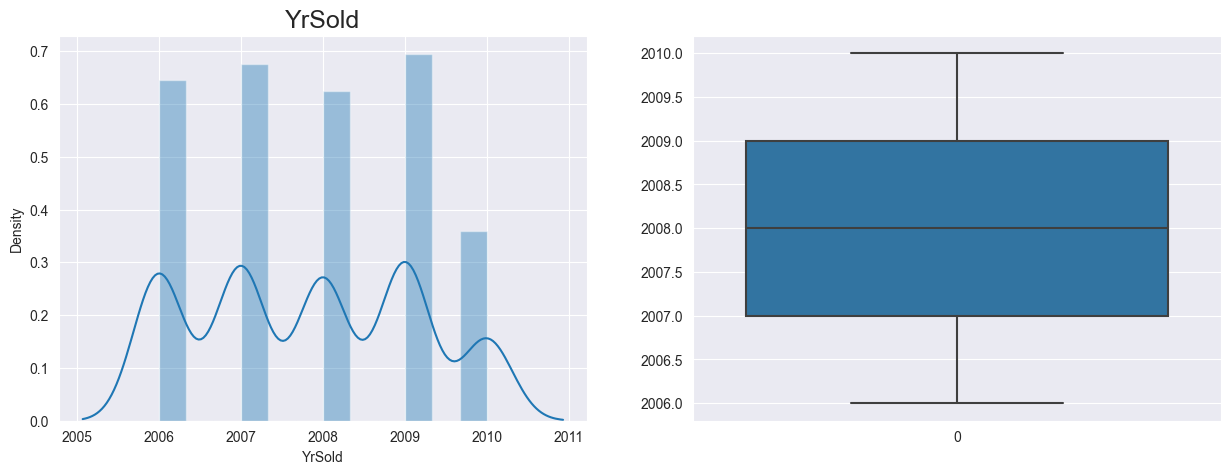

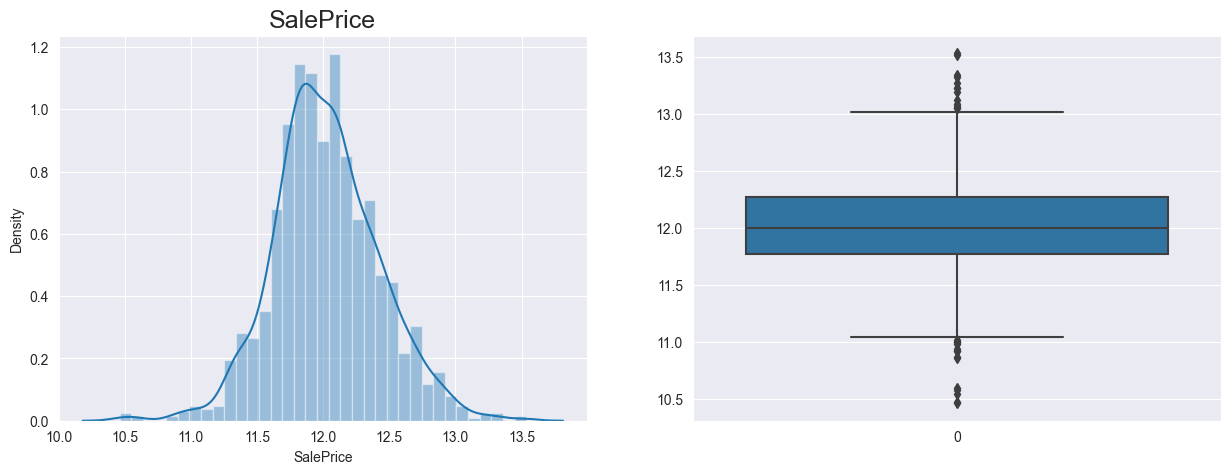

In [15]:
## EDA on numerical variables
for col in numerical_variable:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housingdata[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housingdata[col])
    plt.show()    

###### Some variables have outliers and distribution is also skewed

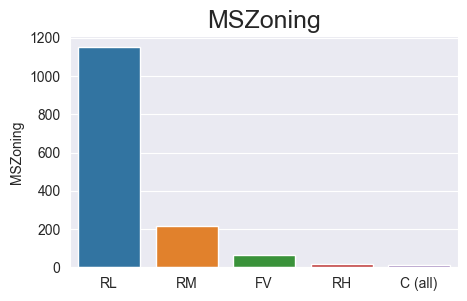

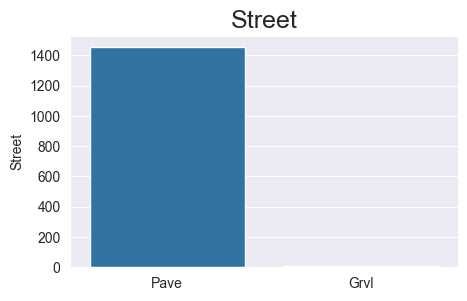

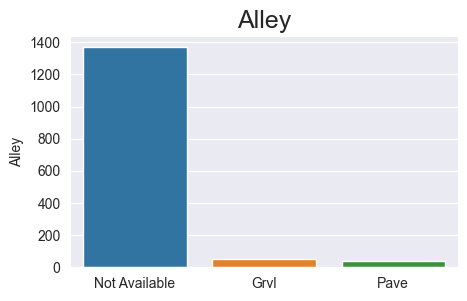

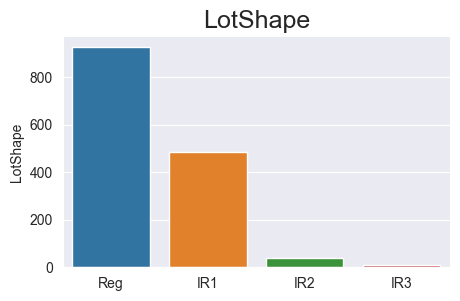

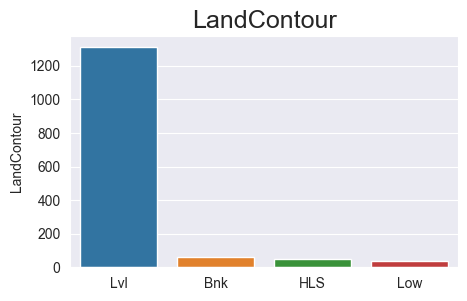

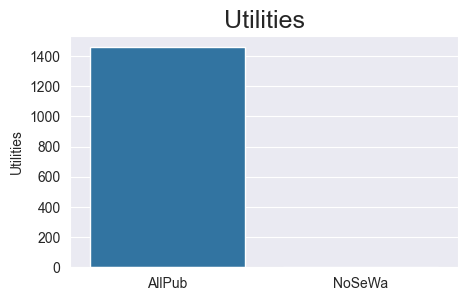

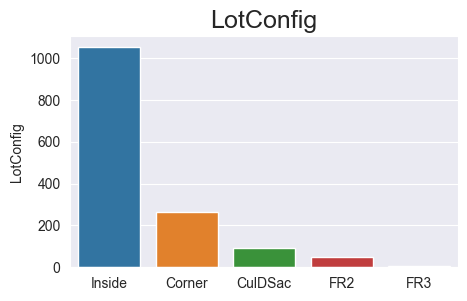

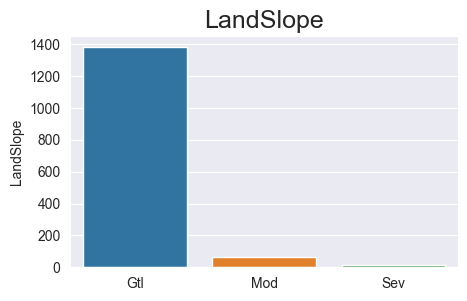

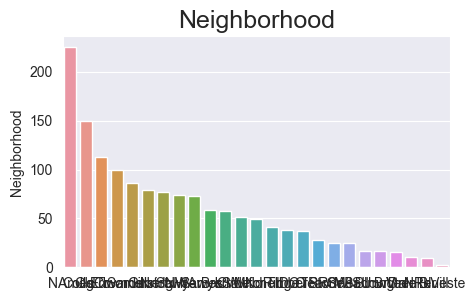

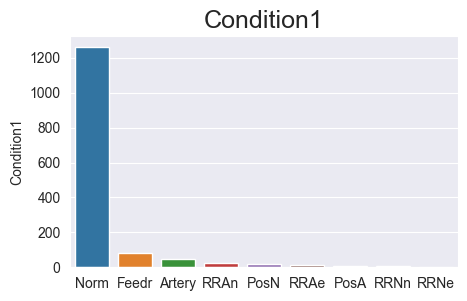

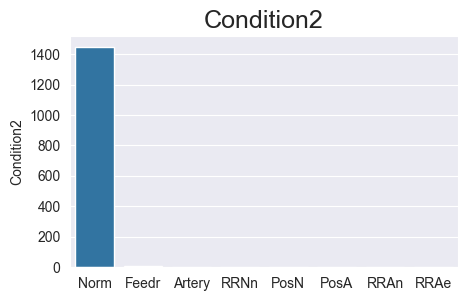

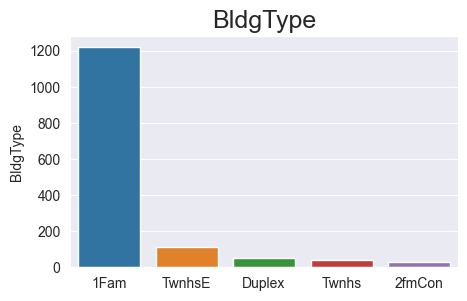

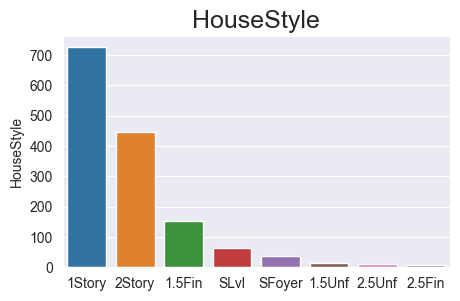

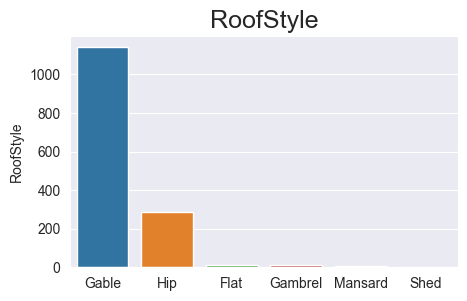

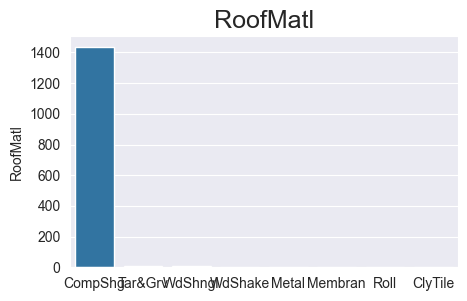

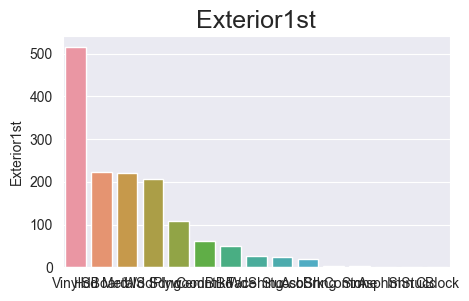

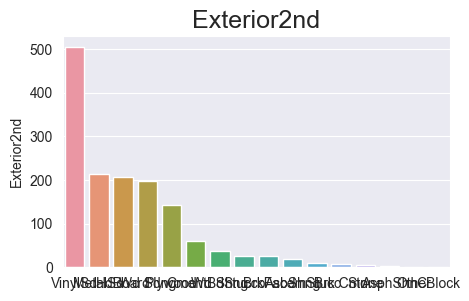

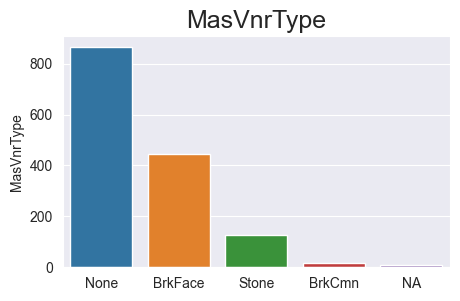

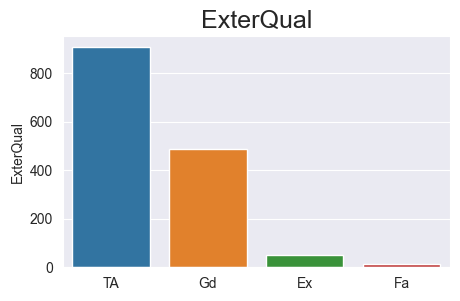

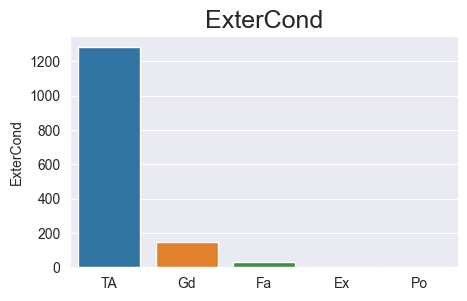

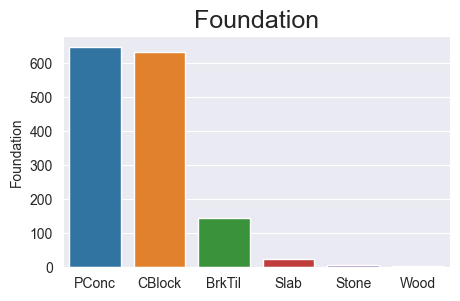

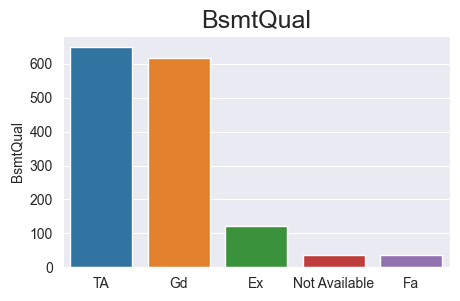

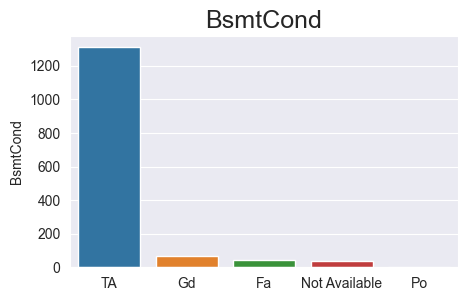

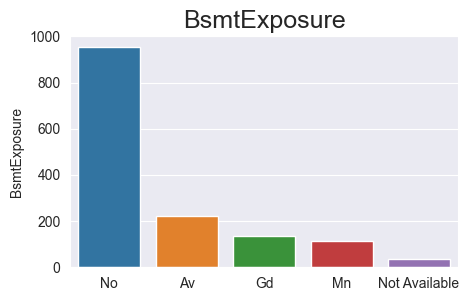

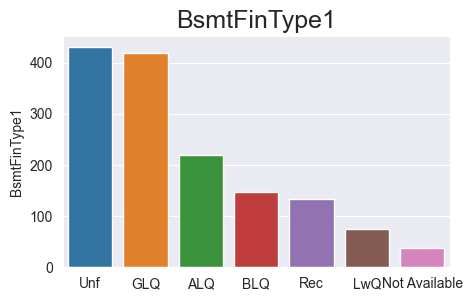

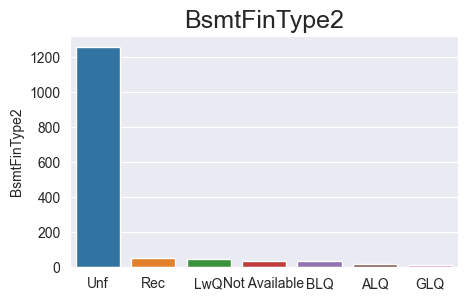

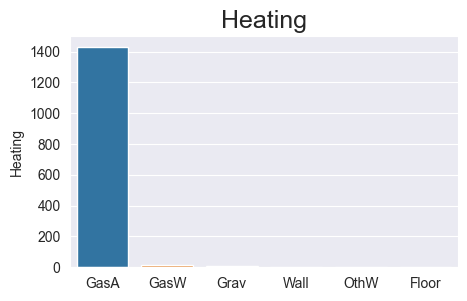

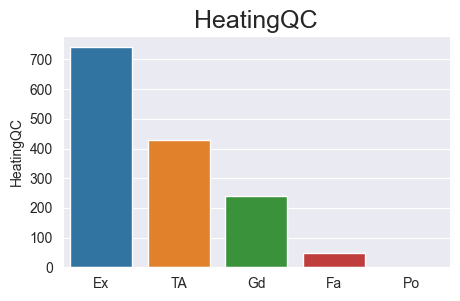

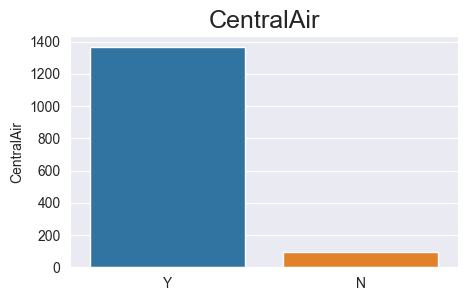

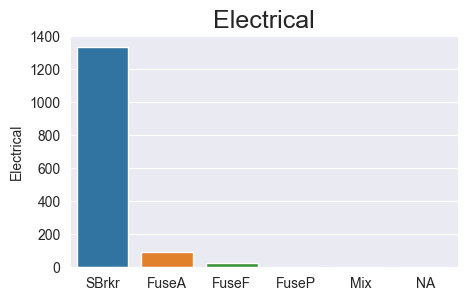

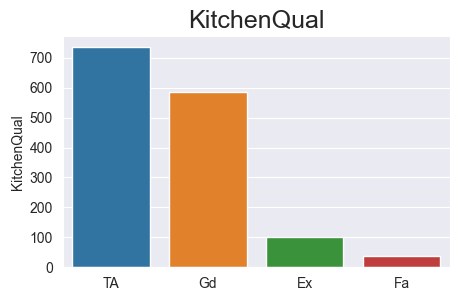

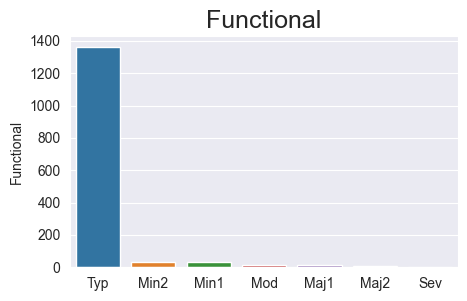

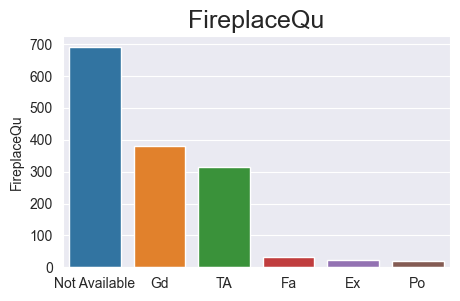

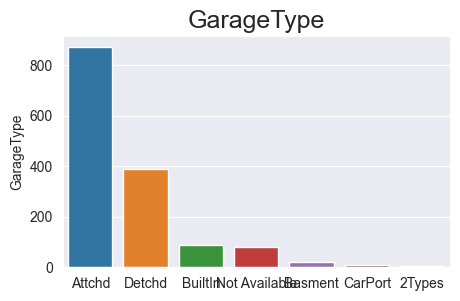

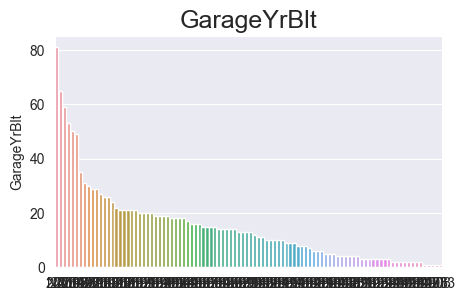

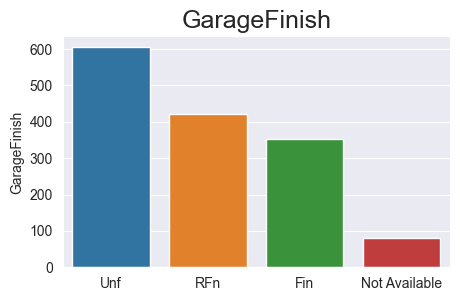

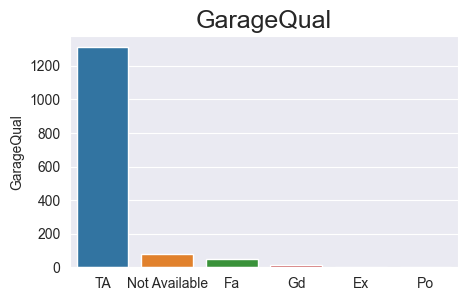

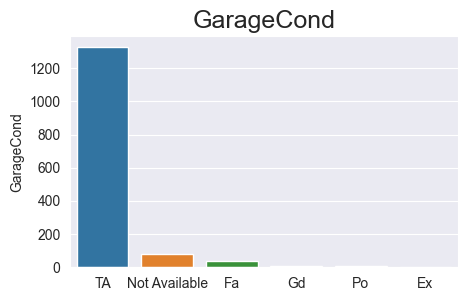

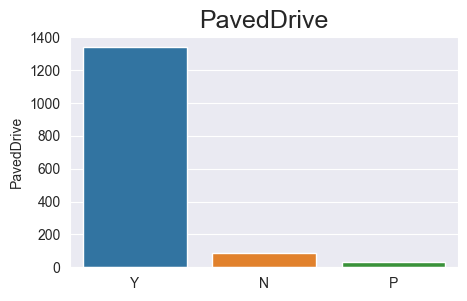

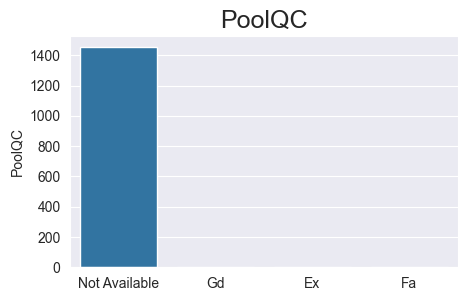

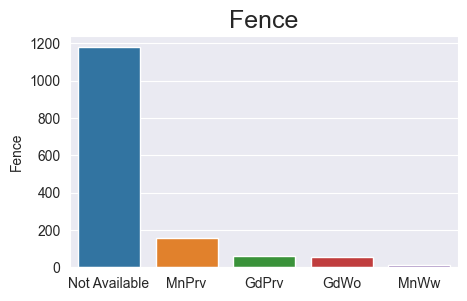

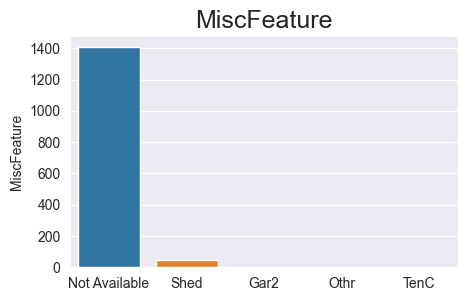

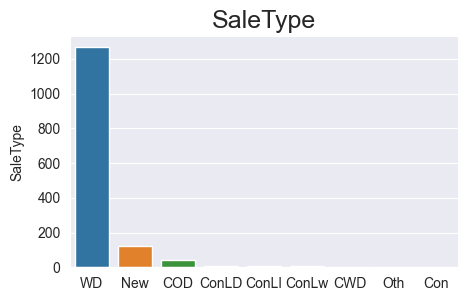

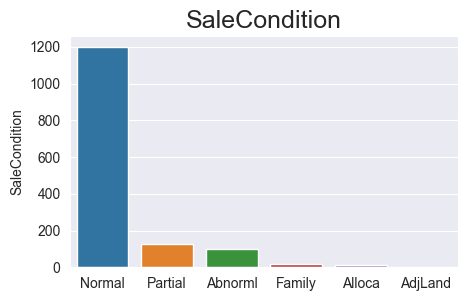

In [16]:
## EDA on categorical variables
for col in categorical_variable:
    plt.figure(figsize=(5, 3))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x=housingdata[col].value_counts().index, y=housingdata[col].value_counts())
    plt.show()

#### Bivariable Ananlysis

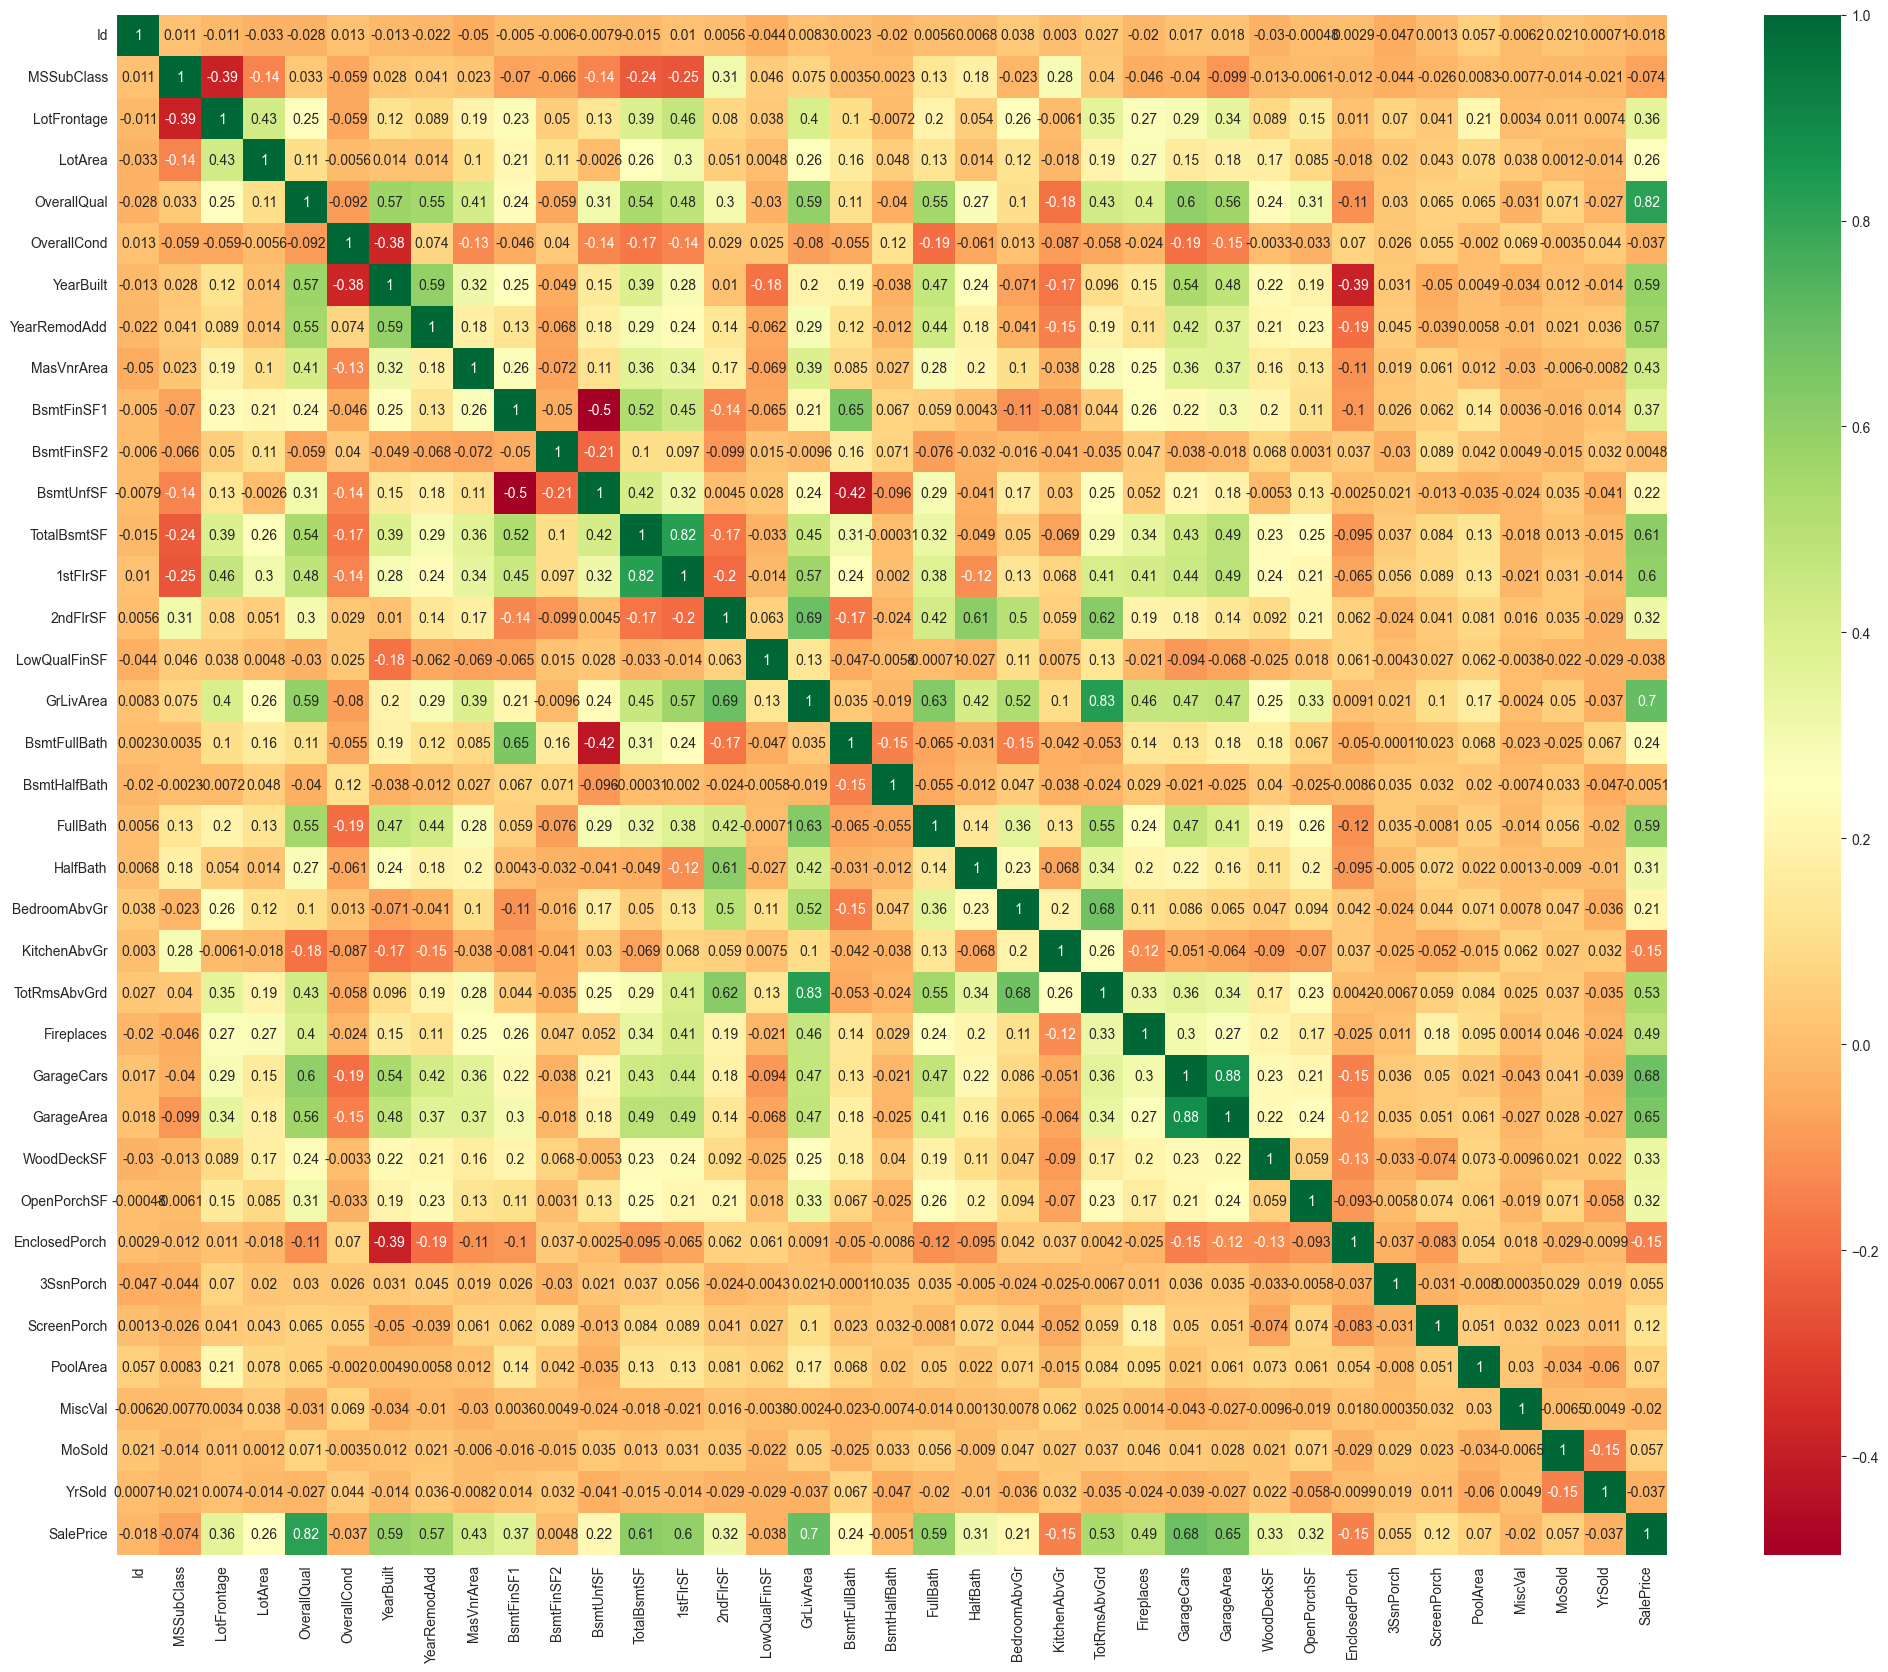

In [17]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(housingdata[numerical_variable].corr(), annot=True, cmap='RdYlGn');



- multicollinearity is present
- Some variable are highly correlated
- SalePrice is highly correlated with OverallQual, YearBuild, GrLivArea


### Feature Engineering

In [18]:
### lets create the new variable
housingdata['Age'] = housingdata['YrSold'] - housingdata['YearBuilt']

In [19]:
housingdata.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True) ## drop the variable used to derive variable

### Data Cleaning

#### Null Value Treatment

In [20]:
## let's check proportion of the null values

null_percentage = ((housingdata.isnull().sum() / len(housingdata)) * 100).reset_index()

In [21]:
null_percentage[null_percentage[0]>0]

,index,0
3,LotFrontage,17.739726
25,MasVnrArea,0.547945


In [22]:
## Replacing missing values in the above menitioned two columns by their means
housingdata['LotFrontage'].fillna(housingdata['LotFrontage'].mean(), inplace=True)
housingdata['MasVnrArea'].fillna(housingdata['MasVnrArea'].mean(), inplace=True)

##### Variable Understanding

In [23]:
map_style = {20: '1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}

In [24]:
housingdata['MSSubClass']=housingdata['MSSubClass'].map(map_style)

In [25]:
map_rating = {10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'}

In [26]:
## mapping data with the info given in data description  
housingdata['OverallQual']=housingdata['OverallQual'].map(map_rating)

In [27]:
## mapping data with the info given in data description  
housingdata['OverallCond']=housingdata['OverallCond'].map(map_rating)

#### Creating Dummy variables

In [28]:
## Create dummy variable from the categorical variables  
dummyvar_housing_df = pd.get_dummies(housingdata, drop_first = True)

In [29]:
dummyvar_housing_df['Id'].nunique()

1460

In [30]:
## drop Id
del dummyvar_housing_df['Id']

In [31]:
dummyvar_housing_df

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,2000,0.0,0,0,953,953,953,694,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,1988,119.0,790,163,589,1542,2073,0,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,2006,0.0,275,0,877,1152,1188,1152,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,1996,0.0,49,1029,0,1078,1078,0,...,0,0,0,0,1,0,0,0,1,0


#### Remove Outliers

##### In above graph we have noticed that there are few fetaures with outliers, lets treat them

In [32]:
## Capping outliers to 5% at lower bound and 95% at upper bound
numerical_variable = dummyvar_housing_df.select_dtypes(include=['int64', 'float64'])
numerical_variable = dummyvar_housing_df.columns.tolist()

for col in numerical_variable:
    dummyvar_housing_df[col][dummyvar_housing_df[col] <= dummyvar_housing_df[col].quantile(0.05)] = dummyvar_housing_df[col].quantile(0.05)
    dummyvar_housing_df[col][dummyvar_housing_df[col] >= dummyvar_housing_df[col].quantile(0.95)] = dummyvar_housing_df[col].quantile(0.95)


### Data Preperation

In [33]:
# dummyvar_housing_df=dummyvar_housing_df.sample(frac=0.1)
X = dummyvar_housing_df.drop(columns=['SalePrice'])
y = dummyvar_housing_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Test set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (1168, 384) y_train: (1168,)
Test set shape - X_test: (292, 384) y_test: (292,)


#### Scaling Features

In [34]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

In [35]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Model Building

In [36]:
## we will be using the performance metrics for all the models we will train, Lets make a function to use it efficiently 

def metrics_func(y_train, y_train_pred, y_test, y_pred):
    
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

### Regression Model with Regularisation

#### Ridge Regression

In [42]:
# Initialize RidgeCV with a list of alpha values to try (you can add more values if needed)
alphas = [0.1, 0.5, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0, 10.0]
ridge_model = RidgeCV(alphas=alphas, cv=5)  # cv specifies the number of cross-validation folds

# Fit the model on the training data and find the best alpha
ridge_model.fit(X_train, y_train)

# Get the best alpha value from the cross-validation
best_alpha = ridge_model.alpha_

# Make predictions using the trained model
y_pred = ridge_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
## Optimum value of alpha
ridge_model.alpha_

10.0

In [44]:
## make prediction using the above trained model
y_train_pred = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)

In [45]:
## cal metrics_func to check the performance of the model trained
ridge_metrics = metrics_func(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 12.73
RSS (Test) = 3.32
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.11


#### 91% of variance in data is explained by the model 

In [46]:
## calculate residuals
residuals = y_test - y_pred

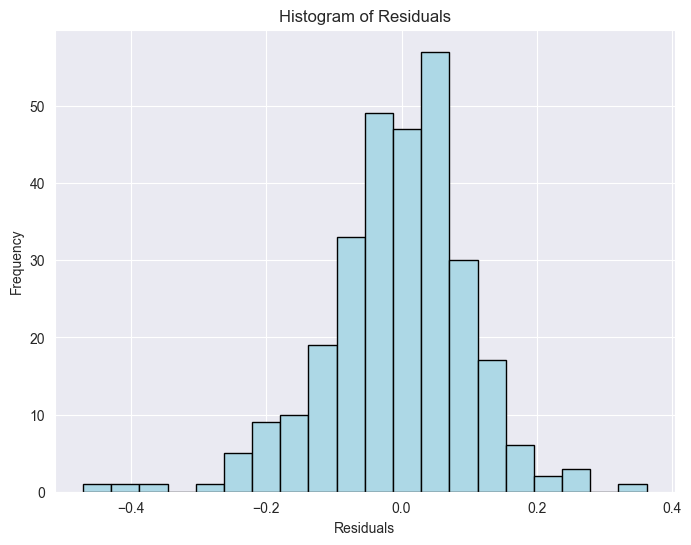

In [47]:
# Plot the histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


#### Lasso

In [48]:
alphas = [0.01,0.0001,0.001,0.1, 0.5, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0, 10.0,11,12,13,14,15,16,17,18,19,20]
lasso_model = LassoCV(alphas=alphas, cv=5)  # cv specifies the number of cross-validation folds

# Fit the model on the training data and find the best alpha
lasso_model.fit(X_train, y_train)

# Get the best alpha value from the cross-validation
best_alpha = lasso_model.alpha_

# Make predictions using the trained model
y_pred = lasso_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
## optimum value of alpha for lasso model 
lasso_model.alpha_

0.001

In [50]:
## make prediction with above trained lasso model
y_train_pred = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)

In [51]:
## check the performace of the trained model
lasso_metrics = metrics_func(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.91
RSS (Train) = 13.85
RSS (Test) = 3.55
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.11


##### Ridge has higher score than lasso

In [52]:
## calculate residuals
residuals = y_test - y_pred

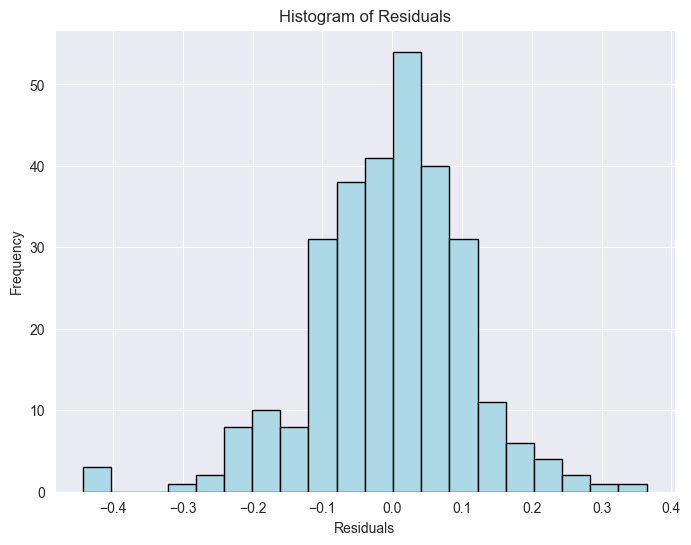

In [53]:
# Plot the histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

### Comparing both model

In [54]:
# Creating a table that has all the metrics of both model to compare

table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.910569,0.902732
R2 Score (Test),0.914829,0.908935
RSS (Train),12.730907,13.846542
RSS (Test),3.322271,3.552154
MSE (Train),0.010900,0.011855
MSE (Test),0.011378,0.012165
RMSE (Train),0.104402,0.108880
RMSE (Test),0.106666,0.110295


### Model Performance

- Ridge Regression is giving the better results as:
    - Hypertuned value of alpha is 10
    - train and test R2 is very close (91%, 91%)
    - Residual plot has normal distribution

### Feature Importance

#### Ridge

In [55]:
## select coefficients of the ridge model 
coefficients = pd.Series(ridge_model.coef_, index=X.columns)

In [56]:
## sort the coefficients 
coefficients.sort_values(ascending=False, inplace=True)

In [57]:
## this are the top 10 predictor variables 
coefficients[:10]

GrLivArea                                                           0.094181
Functional_Typ                                                      0.089472
OverallQual_Very Good                                               0.087841
CentralAir_Y                                                        0.071031
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    0.052664
Neighborhood_Somerst                                                0.047819
TotalBsmtSF                                                         0.047811
Exterior2nd_Wd Sdng                                                 0.045355
MSSubClass_1-STORY 1946 & NEWER ALL STYLES                          0.042694
GarageType_Attchd                                                   0.042613
dtype: float64

In [58]:
ridge_coefficients = coefficients.reset_index()

In [60]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
ridge_coeffs = np.exp(ridge_coefficients[0])
ridge_coeffs.sort_values(ascending=False, inplace=True)
ridge_coeffs.head(10)

0    1.098759
1    1.093597
2    1.091814
3    1.073614
4    1.054075
5    1.048981
6    1.048973
7    1.046399
8    1.043619
9    1.043534
Name: 0, dtype: float64

#### Lasso

In [61]:
## Coefficients of the lasso model
coefficients = pd.Series(lasso_model.coef_, index=X.columns)
coefficients.sort_values(ascending=False, inplace=True)
coefficients[:10]

GrLivArea                0.110921
Functional_Typ           0.090499
OverallQual_Very Good    0.083837
CentralAir_Y             0.065963
Condition1_Norm          0.044850
TotalBsmtSF              0.044586
Neighborhood_Somerst     0.039051
Neighborhood_NridgHt     0.036889
YearRemodAdd             0.034046
OverallCond_Good         0.033333
dtype: float64

In [62]:
lasso_coefficients = coefficients.reset_index()

In [63]:
lasso_coeffs = np.exp(lasso_coefficients[0])
lasso_coeffs.sort_values(ascending=False, inplace=True)
lasso_coeffs.head(10)

0    1.117307
1    1.094721
2    1.087452
3    1.068187
4    1.045871
5    1.045594
6    1.039824
7    1.037578
8    1.034632
9    1.033895
Name: 0, dtype: float64

# Business Insights

- ['GrLivArea',
 'Functional_Typ',
 'OverallQual_Very Good',
 'CentralAir_Y',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'Neighborhood_Somerst',
 'TotalBsmtSF',
 'Exterior2nd_Wd Sdng',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'GarageType_Attchd'] plays important role in describing price of the house
- if the home functionality is typical, then the price of house will increase by 1.09 to 1.10 times
- if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.09 to 1.10 times
- if Somerst is a nearby location, then the price of house will increase by 1.04 to 1.05 times

# Subjective Question
## Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


#### Ridge Regression

In [ ]:
ridge_model = Ridge(alpha=20)
ridge_model.fit(X_train, y_train)

In [ ]:
y_pred=ridge_model.predict(X_test)
y_train_pred=ridge_model.predict(X_train)

In [ ]:
ridge_metrics_new = metrics_func(y_train, y_train_pred, y_test, y_pred)

#### Lasso Regression

In [ ]:
lasso_model=Lasso(alpha=0.002)
lasso_model.fit(X_train, y_train)

In [ ]:
y_pred=lasso_model.predict(X_test)
y_train_pred=lasso_model.predict(X_train)

In [ ]:
lasso_metrics_new = metrics_func(y_train, y_train_pred, y_test, y_pred)

In [ ]:
coefficients = pd.Series(ridge_model.coef_, index=X.columns)
coefficients.sort_values(ascending=False, inplace=True)

In [ ]:
coefficients[:10]

In [ ]:
ridge_features = coefficients.reset_index()['index'].tolist()[:10]

In [ ]:
coefficients = pd.Series(lasso_model.coef_, index=X.columns)
coefficients.sort_values(ascending=False, inplace=True)

In [ ]:
coefficients[:10]

In [ ]:
lasso_features = coefficients.reset_index()['index'].tolist()[:10]

In [ ]:
# Creating a table which contain all the metrics

table = {
            'Ridge Regression' : ridge_features,
            'Lasso Regression' : lasso_features
        }

final_metric = pd.DataFrame(table, columns = ['Ridge Regression', 'Lasso Regression'] )
# final_metric.set_index('Metric')

In [ ]:
final_metric

## Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

It depends upon the use case:
    If we need limited number of features than we can select Lasso Regression
    If we just need to penalise the features we can select Ridge Regression. 

## Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [72]:
lasso_cols_drop_top_5 =lasso_coefficients['index'].tolist()[:5]

In [73]:
lasso_cols_drop_top_5

['GrLivArea',
 'Functional_Typ',
 'OverallQual_Very Good',
 'CentralAir_Y',
 'Condition1_Norm']

In [74]:
## drop them from train and test data
X_train_dropped = X_train.drop(lasso_cols_drop_top_5, axis=1)
X_test_dropped = X_test.drop(lasso_cols_drop_top_5, axis=1)

In [76]:
alphas = [0.01,0.0001,0.001,0.1, 0.5, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0, 10.0,11,12,13,14,15,16,17,18,19,20]
lasso_model = LassoCV(alphas=alphas, cv=5)  # cv specifies the number of cross-validation folds

# Fit the model on the training data and find the best alpha
lasso_model.fit(X_train_dropped, y_train)

# Get the best alpha value from the cross-validation
best_alpha = lasso_model.alpha_

# Make predictions using the trained model
y_pred = lasso_model.predict(X_test_dropped)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [77]:
y_train_pred = lasso_model.predict(X_train_dropped)
y_pred = lasso_model.predict(X_test_dropped)

In [78]:
lasso_metrics = metrics_func(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.89
R-Squared (Test) = 0.91
RSS (Train) = 16.04
RSS (Test) = 3.57
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.12
RMSE (Test) = 0.11


In [79]:
lasso_model.alpha_

0.001

In [81]:
coefficients = pd.Series(lasso_model.coef_, index=X_train_dropped.columns)
coefficients.sort_values(ascending=False, inplace=True)
coefficients[:5]

2ndFlrSF                0.100275
1stFlrSF                0.059120
TotalBsmtSF             0.057776
OverallCond_Good        0.045514
Neighborhood_Somerst    0.041073
dtype: float64

## Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Here are some strategies to achieve model robustness and generalizability:

Cross-Validation: Use techniques like k-fold cross-validation to assess the model's performance on multiple subsets of the data. This helps in obtaining a more stable estimate of the model's accuracy and ensures that the model is not overfitting to the specific training data.

Train-Test Split: Split the dataset into separate training and test sets. Train the model on the training set and evaluate its performance on the unseen test set. This helps to assess how well the model generalizes to new, unseen data.

Regularization: Apply regularization techniques like L1 (Lasso) or L2 (Ridge) regularization to avoid overfitting and promote simpler models. Regularization helps in controlling the complexity of the model and prevents it from memorizing noise in the training data.

Feature Engineering and Selection: Carefully choose relevant features and perform feature engineering to extract meaningful information from the data. Removing irrelevant or highly correlated features can help the model focus on important patterns.

Data Preprocessing: Properly preprocess the data by handling missing values, scaling features, and encoding categorical variables. Consistent and appropriate data preprocessing ensures the model is less sensitive to variations in the data.

Hyperparameter Tuning: Optimize hyperparameters of the model using techniques like grid search or random search. Proper tuning helps in finding the best configuration that maximizes the model's performance on the test set.

Implications for Model Accuracy:

Robust and generalizable models tend to have more stable and reliable performance across different datasets.
A robust model is less likely to be affected by small changes in the training data and can make consistent predictions on unseen data.
Generalizable models have the ability to perform well on new, previously unseen data points, which is essential for real-world deployment.
By improving robustness and generalizability, the model's accuracy on the test set is more representative of its performance on new data, reducing the risk of overfitting.